# **Proyecto Final**
# **Grupo #6**
# **Predicción de Fraude en Abuso de Consumo de Navegación**



# **Descripción del proceso generador de los datos**

El proceso consiste en obtener toda la información sobre las características de los usuarios que tienen contratado el servicio de internet residencial para encontrar patrones que nos indique si este usuario es un abusador del servicio para crear señales predictivas y potentes hacia la variable objetivo (respuesta).

Este proceso almacena en una tabla histórica la información del usuario se utilizaron fuentes de datos que se analizaron, unieron y ubicaron en forma de tabla. Los datos se agregaron y resumieron hasta el nivel de detalle correcto: por ejemplo, cada fila del conjunto de datos representa un cliente único, y cada columna representa información resumida para el cliente, como el total navegado por mes, nombre y dirección del cliente e información del nodo asociado. Las columnas irrelevantes se descartaron y los registros no válidos se filtraron y se removieron.

# **Descripción de los datos**

Datos Estructurados – Base de datos Oracle 


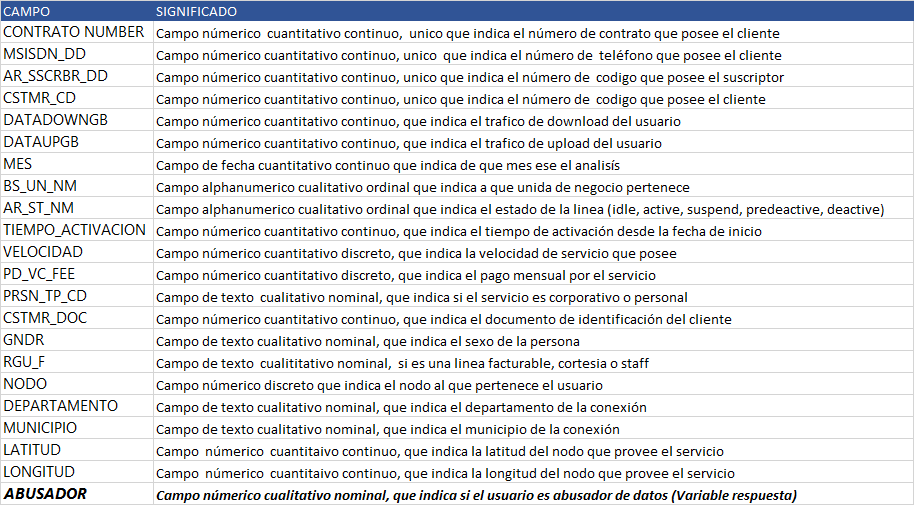

# **Estadísticas de resumen de los datos por columna**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.graphics.mosaicplot import mosaic


In [9]:
url_train = 'https://raw.githubusercontent.com/sal201463/ProyectoU/main/wo_home.csv'
url_test = 'https://raw.githubusercontent.com/sal201463/ProyectoU/main/wo_home_test.csv'
url_test2= 'https://raw.githubusercontent.com/sal201463/ProyectoU/main/wo_home_test_0321.csv'

train = pd.read_csv(url_train,encoding='latin-1')
test = pd.read_csv(url_test,encoding='latin-1')
test2= pd.read_csv(url_test2,encoding='latin-1')

In [251]:
#train['ORIGEN']= 'TRAIN'
#test['ORIGEN']= 'TEST'
#test2['ORIGEN']= 'TEST'
df_test=test2

In [252]:
df_test

,CONTRATO,MSISDN_DD,AR_SSCRBR_DD,CSTMR_CD,DATADOWNGB,DATAUPGB,MES,BS_UN_NM,AR_ST_NM,TIEMPO_ACTIVACION,VELOCIDAD,PD_VC_FEE,PRSN_TP_CD,CSTMR_DOC,GNDR,RGU_F,NODO,DEPARTAMENTO,MUNICIPIO,LATITUD,LONGITUD,ABUSADOR,DATATOTALGB,exp_DATATOTALGB,VELOCIDAD_MB,DATATOTALGB_mm
0,3634412,12470585,66232226,-1072472,12967.99,623.29,02/2021,HOME,ACTIVO,440,20,223.21,P,2485440981229,M,Y,SJ3137A,Guatemala,San Juan Sacatepequez (Ciudad Quetzal),14.7017,-90.5873,1,13591.28,581132.680203,20 MB,0.061379
1,3906447,12699367,74344087,-1224226,3107.86,250.71,02/2021,HOME,ACTIVO,101,10,196.43,P,2377030410101,F,Y,SP3434A,Guatemala,San Pedro Sacatepequez,14.6849,-90.6073,1,3358.57,26.571880,10 MB,0.011495
2,4059179,12705673,74505705,-1315259,2569.87,582.63,02/2021,HOME,ACTIVO,96,35,339.29,P,1627991790608,M,Y,CV6414A,Sacatepequez,Ciudad Vieja,14.5279,-90.7512,1,3152.50,21.728251,35 MB,0.010491
3,4056952,12704991,74471357,-1314096,6913.31,613.61,02/2021,HOME,ACTIVO,95,25,303.57,P,1952375440110,F,Y,SJ2929A,Guatemala,San Juan Sacatepequez,14.7161,-90.6427,1,7526.92,1556.986985,25 MB,0.031816
4,4052202,12703257,74385749,-1311281,4042.70,567.23,02/2021,HOME,ACTIVO,97,70,758.93,P,2732433141204,M,Y,SM8963A,San Marcos,San Marcos,14.9664,-91.7961,1,4609.93,90.186952,70 MB,0.017596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3586631,12458739,65483206,-1050278,982.26,28.71,02/2021,HOME,ACTIVO,477,20,223.21,P,2220320301413,F,Y,TO5349A,Guatemala,Capital,14.5842,-90.4967,0,1010.97,2.683912,20 MB,0.000051
996,3586709,12458675,65483925,-1050314,2209.16,187.87,02/2021,HOME,ACTIVO,478,15,178.57,P,2940550022207,M,Y,SJ3336A,Guatemala,San Juan Sacatepequez (Ciudad Quetzal),14.6922,-90.5910,0,2397.03,10.390060,15 MB,0.006808
997,3588250,12458934,65519879,-1050931,1076.67,36.77,02/2021,HOME,ACTIVO,465,20,223.21,P,1926818501008,F,Y,MP7344A,Guatemala,Villa Canales,14.4783,-90.5360,0,1113.44,2.966384,20 MB,0.000551
998,3586794,12458747,65484845,-1050349,1414.65,48.53,02/2021,HOME,ACTIVO,477,15,178.57,P,3207726590501,M,Y,PP8854A,Escuintla,Escuintla,14.3009,-90.7589,0,1463.18,4.174050,15 MB,0.002256


In [11]:
#df = pd.concat([train, test])

In [12]:
df = train

In [13]:
ids = df["CONTRATO"]
df[ids.isin(ids[ids.duplicated()])]

,CONTRATO,MSISDN_DD,AR_SSCRBR_DD,CSTMR_CD,DATADOWNGB,DATAUPGB,MES,BS_UN_NM,AR_ST_NM,TIEMPO_ACTIVACION,VELOCIDAD,PD_VC_FEE,PRSN_TP_CD,CSTMR_DOC,GNDR,RGU_F,NODO,DEPARTAMENTO,MUNICIPIO,LATITUD,LONGITUD,ABUSADOR


In [220]:
ids = df_test["CONTRATO"]
df_test[ids.isin(ids[ids.duplicated()])]

,CONTRATO,MSISDN_DD,AR_SSCRBR_DD,CSTMR_CD,DATADOWNGB,DATAUPGB,MES,BS_UN_NM,AR_ST_NM,TIEMPO_ACTIVACION,VELOCIDAD,PD_VC_FEE,PRSN_TP_CD,CSTMR_DOC,GNDR,RGU_F,NODO,DEPARTAMENTO,MUNICIPIO,LATITUD,LONGITUD,ABUSADOR,DATATOTALGB,exp_DATATOTALGB,VELOCIDAD_MB,DATATOTALGB_mm


In [14]:
#print(df[df['ORIGEN']=='TRAIN'])

In [15]:
print(df)

      CONTRATO  MSISDN_DD  AR_SSCRBR_DD  ...  LATITUD  LONGITUD  ABUSADOR
0       966229   12224893      42771774  ...  14.5202  -90.6008         1
1      3926793   12663376      72510954  ...  14.9701  -91.8009         1
2      3924742   12664506      72488898  ...  14.7026  -91.8762         1
3      3904070   12657723      72165521  ...  14.8363  -91.5047         1
4      3875960   12651742      71681860  ...  14.7092  -91.8514         1
...        ...        ...           ...  ...      ...       ...       ...
4313   3928571   12662681      72558616  ...  14.9613  -91.7946         0
4314   3922369   12662287      72470314  ...  14.5965  -90.4757         0
4315   3919195   12662134      72428579  ...  14.4954  -90.5529         0
4316   3917375   12662637      72410951  ...  14.6288  -90.5507         0
4317   3920252   12663201      72447088  ...  14.9613  -91.7946         0

[4318 rows x 22 columns]


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4318 entries, 0 to 4317
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CONTRATO           4318 non-null   int64  
 1   MSISDN_DD          4318 non-null   int64  
 2   AR_SSCRBR_DD       4318 non-null   int64  
 3   CSTMR_CD           4318 non-null   int64  
 4   DATADOWNGB         4318 non-null   float64
 5   DATAUPGB           4318 non-null   float64
 6   MES                4318 non-null   object 
 7   BS_UN_NM           4318 non-null   object 
 8   AR_ST_NM           4318 non-null   object 
 9   TIEMPO_ACTIVACION  4318 non-null   int64  
 10  VELOCIDAD          4318 non-null   int64  
 11  PD_VC_FEE          4318 non-null   float64
 12  PRSN_TP_CD         4318 non-null   object 
 13  CSTMR_DOC          4318 non-null   object 
 14  GNDR               4318 non-null   object 
 15  RGU_F              4318 non-null   object 
 16  NODO               4247 

In [17]:
df.describe()

,CONTRATO,MSISDN_DD,AR_SSCRBR_DD,CSTMR_CD,DATADOWNGB,DATAUPGB,TIEMPO_ACTIVACION,VELOCIDAD,PD_VC_FEE,LATITUD,LONGITUD,ABUSADOR
count,4.318000e+03,4.318000e+03,4.318000e+03,4.318000e+03,4318.000000,4318.000000,4318.000000,4318.000000,4318.000000,4247.000000,4247.000000,4318.000000
mean,2.587863e+06,1.228272e+07,4.738842e+07,-6.210046e+05,1689.132939,109.776130,2325.447429,32.038212,634.318877,14.618530,-90.620634,0.057897
std,8.403677e+05,1.852180e+05,1.527295e+07,3.742503e+05,3532.891038,274.252863,6800.854668,25.097912,622.651569,1.620466,1.667637,0.233576
min,9.592000e+05,1.200006e+07,1.960811e+07,-1.236180e+06,60.600000,0.450000,167.000000,2.000000,142.860000,-90.323900,-91.881600,0.000000
25%,1.823673e+06,1.211675e+07,3.266250e+07,-9.484085e+05,1020.165000,33.617500,601.000000,20.000000,258.930000,14.550850,-90.599100,0.000000
50%,2.637537e+06,1.227630e+07,4.795028e+07,-6.418455e+05,1122.985000,49.865000,1142.000000,20.000000,312.500000,14.614400,-90.550800,0.000000
75%,3.354215e+06,1.241790e+07,6.101812e+07,-2.863752e+05,1341.727500,86.777500,1888.000000,40.000000,847.320000,14.659300,-90.500000,0.000000
max,3.928571e+06,1.266451e+07,7.255862e+07,9.849800e+05,121806.160000,9455.760000,44316.000000,100.000000,2232.140000,15.734600,15.104300,1.000000


# Como podemos ver en el Summary de los datos cuantitativos se identificaron variables que pueden apoyar al analisis para identificar Abusadores.   
# Para identificar un abusador de Home, vamos a utilizar variables importantes como el consumo de datos (Up & Down) y conocer el comportamiento de un abusador y un usuario normal.
# La velocidad como vemos utilizan planes de 10 Megas hasta planes maximo de mas de 100 MB, la idea es poder utilizar esta variable para identificar si los abusadores comunmente compran planes mas altos o usan planes bajos. 
# Tomamos la variable de latitud y longitud para geoposicionar mas adelante donde se encuentran esos abusadores a nivel nacional y poder detectar si estan en un sector en especifico (nodo) o estan dispersos en Guatemala y relacionarlos al consumo.  
#


In [18]:
# Se muestra una muestra de los datos cuantitativos y cualitativos.  
df.head()

,CONTRATO,MSISDN_DD,AR_SSCRBR_DD,CSTMR_CD,DATADOWNGB,DATAUPGB,MES,BS_UN_NM,AR_ST_NM,TIEMPO_ACTIVACION,VELOCIDAD,PD_VC_FEE,PRSN_TP_CD,CSTMR_DOC,GNDR,RGU_F,NODO,DEPARTAMENTO,MUNICIPIO,LATITUD,LONGITUD,ABUSADOR
0,966229,12224893,42771774,-646900,3638.40,214.33,11/2020,HOME,ACTIVO,1361,40,1250.00,P,60895,M,Y,MP6535B,Guatemala,Villa Nueva,14.5202,-90.6008,1
1,3926793,12663376,72510954,-1235265,4374.58,308.29,11/2020,HOME,ACTIVO,167,100,2232.14,P,2240838991202,M,Y,SM9063A,San Marcos,San Marcos,14.9701,-91.8009,1
2,3924742,12664506,72488898,-1234158,3170.28,214.94,11/2020,HOME,ACTIVO,172,30,406.25,P,2773150420920,M,Y,CQ4038A,Quetzaltenango,Coatepeque,14.7026,-91.8762,1
3,3904070,12657723,72165521,-1222867,8896.64,576.19,11/2020,HOME,ACTIVO,187,70,1785.71,P,2224990950701,M,Y,QX6590A,Quetzaltenango,Quetzaltenango,14.8363,-91.5047,1
4,3875960,12651742,71681860,-1207068,5377.29,456.17,11/2020,HOME,ACTIVO,211,40,1250.00,P,3369741320920,M,Y,CQ4141A,Quetzaltenango,Coatepeque,14.7092,-91.8514,1


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff8af296450>,
      dtype=object)

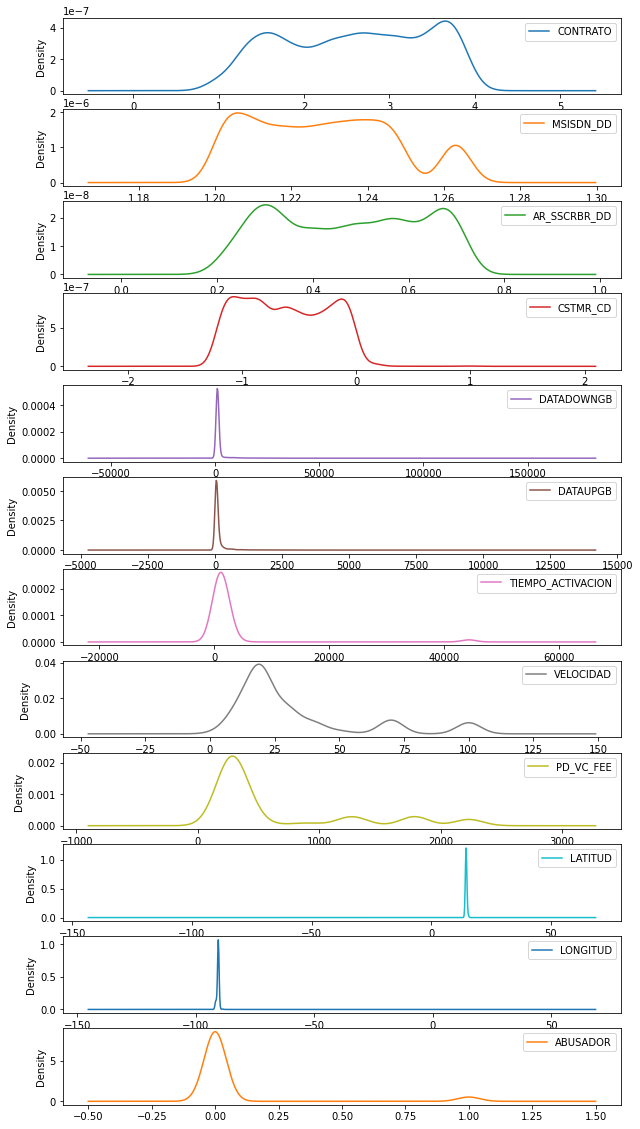

In [19]:
df.plot.kde(subplots=True, figsize=(10,20), sharex=False)

# Graficamente podemos observar que el UP and Down, tiempo de activacion, velocidad tienen una distribucion normal, variables como el contrato, cliente, identificador del plan no podemos utilizarlo para poder identificar un abusador, sin embargo podemos hacer una transformacion para tratarlo como un factor en el caso del cliente ya que pueden tener varios servicios contratados a un mismo cliente.

# **Análisis exploratorio inicial de los datos**

In [253]:
df['VELOCIDAD'].value_counts()

df['VELOCIDAD_MB'] = df['VELOCIDAD'].astype(str)+" MB"
df_test['VELOCIDAD_MB'] = df_test['VELOCIDAD'].astype(str)+" MB"

# Se graficaran los datos para identifcar la cantidad de usuarios por plan contratado.


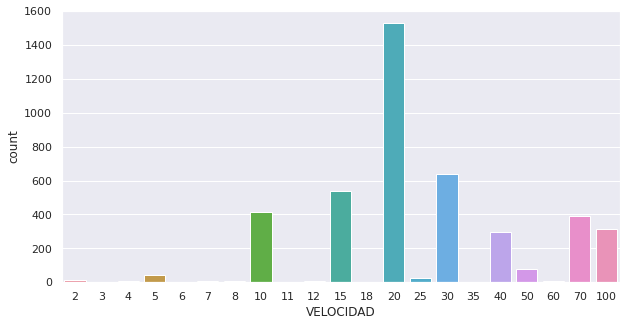

In [21]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='VELOCIDAD')

# Se puede observar que el plan preferencial de los usuarios estan en (10,15,20) Megas, y mas adelante podriamos hacer un cluster para separar el comportamiento de los usuarios normales y los abusadores para identificar donde se concentran. 

In [22]:
bar_data = df.groupby(['VELOCIDAD_MB','ABUSADOR']).size().reset_index(name='counts') 

In [23]:
bar_data.head()

,VELOCIDAD_MB,ABUSADOR,counts
0,10 MB,0,409
1,10 MB,1,4
2,100 MB,0,175
3,100 MB,1,142
4,11 MB,0,1


# Se genera un frame agrupando la velocidad y la variable respuesta si es abusador( 1) o usuario (0).  Esto nos servira para utilizar en la grafica siguiente y utilizar como un mapa de calor para identificar el abusador y el plan mas utilizado.  

In [24]:
px.bar(data_frame=bar_data,
       x='VELOCIDAD_MB', y='counts',
       color='ABUSADOR', barmode='group',
       color_discrete_sequence=px.colors.sequential.Blues_r,
       width=800, height=400)

# Podemos visualizar en el grafico que se concentran los abusadores en los planes de 100MB y 70 MB sin embargo mas adelante para dar una mejor visualizacion y entender el problema vamos a cambiar la visualizacion usando un grafico de barras de proporcion. 

In [25]:
c = df.groupby(['VELOCIDAD_MB','ABUSADOR']).size().rename("counts")
bar_percentage_data = (c / c.groupby(level=0).sum()).reset_index(name='proportion')

In [26]:
px.bar(data_frame=bar_percentage_data.sort_values(['ABUSADOR','proportion'], ascending=[True,False]),
       x='VELOCIDAD_MB', y='proportion',  
       color='ABUSADOR',  color_discrete_sequence=px.colors.sequential.Blues_r, 
       width=800, height=400)

# En el grafico siguiente observamos que los abusadores se concentran en planes de 60 y 100MB sin embargo tambien observamos que hay una parte donde son usuarios legitimos en los planes de 100, 50, 70 donde creemos que vamos a tener que clasificar correctamente si deseamos hacer una acción con estos abusadores que pueden estar haciendo fraude como la reventa de la señal. 

In [27]:
df2= df.loc[df['ABUSADOR'] == 0]
df3= df.loc[df['ABUSADOR'] == 1]


In [28]:
df3.head()

,CONTRATO,MSISDN_DD,AR_SSCRBR_DD,CSTMR_CD,DATADOWNGB,DATAUPGB,MES,BS_UN_NM,AR_ST_NM,TIEMPO_ACTIVACION,VELOCIDAD,PD_VC_FEE,PRSN_TP_CD,CSTMR_DOC,GNDR,RGU_F,NODO,DEPARTAMENTO,MUNICIPIO,LATITUD,LONGITUD,ABUSADOR,VELOCIDAD_MB
0,966229,12224893,42771774,-646900,3638.40,214.33,11/2020,HOME,ACTIVO,1361,40,1250.00,P,60895,M,Y,MP6535B,Guatemala,Villa Nueva,14.5202,-90.6008,1,40 MB
1,3926793,12663376,72510954,-1235265,4374.58,308.29,11/2020,HOME,ACTIVO,167,100,2232.14,P,2240838991202,M,Y,SM9063A,San Marcos,San Marcos,14.9701,-91.8009,1,100 MB
2,3924742,12664506,72488898,-1234158,3170.28,214.94,11/2020,HOME,ACTIVO,172,30,406.25,P,2773150420920,M,Y,CQ4038A,Quetzaltenango,Coatepeque,14.7026,-91.8762,1,30 MB
3,3904070,12657723,72165521,-1222867,8896.64,576.19,11/2020,HOME,ACTIVO,187,70,1785.71,P,2224990950701,M,Y,QX6590A,Quetzaltenango,Quetzaltenango,14.8363,-91.5047,1,70 MB
4,3875960,12651742,71681860,-1207068,5377.29,456.17,11/2020,HOME,ACTIVO,211,40,1250.00,P,3369741320920,M,Y,CQ4141A,Quetzaltenango,Coatepeque,14.7092,-91.8514,1,40 MB


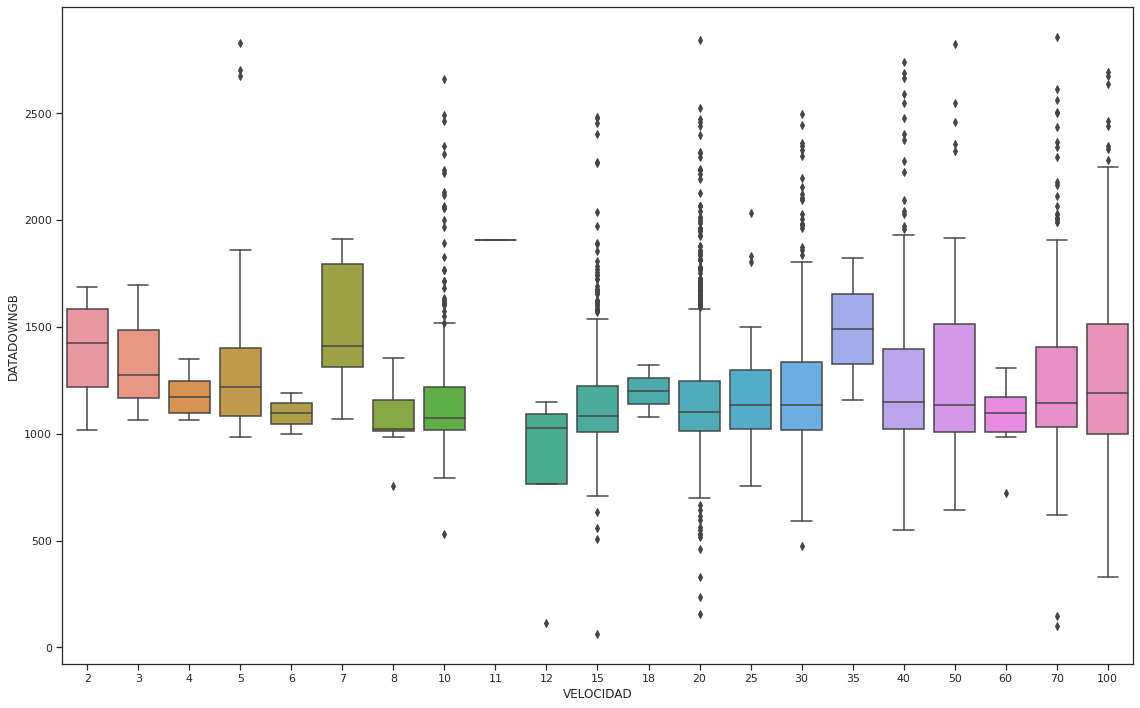

In [29]:
sns.set_style('ticks')
fig, (ax0) = plt.subplots(ncols=1,nrows=1,figsize=(16,10))
# the size of A4 paper
#fig.set_size_inches(11.7, 8.27)
ax0 = sns.boxplot(x='VELOCIDAD', y='DATADOWNGB', data=df2)
fig.tight_layout()

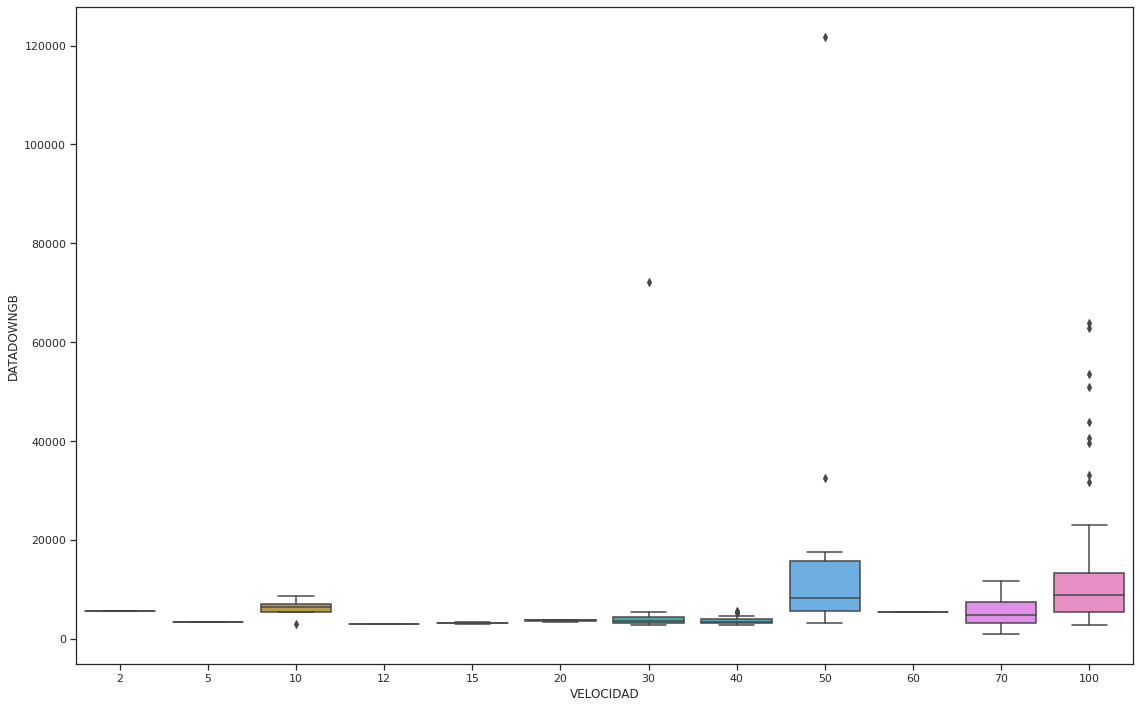

In [30]:
sns.set_style('ticks')
fig, (ax0) = plt.subplots(ncols=1,nrows=1,figsize=(16,10))
# the size of A4 paper
#fig.set_size_inches(11.7, 8.27)
ax0 = sns.boxplot(x='VELOCIDAD', y='DATADOWNGB', data=df3)
fig.tight_layout()

In [31]:
c = df.groupby(['NODO','ABUSADOR']).size().rename("counts")
bar_percentage_data = (c / c.groupby(level=0).sum()).reset_index(name='proportion')

In [32]:
print(c)

NODO     ABUSADOR
AB3945A  0           6
AB4045A  0           4
AB4144A  0           2
AB4144B  0           5
AB4146A  0           2
                    ..
ZA5159A  0           5
         1           5
ZA5258A  1           2
ZC4351A  0           3
ZC4451A  0           1
Name: counts, Length: 1171, dtype: int64


In [33]:
px.bar(data_frame=bar_percentage_data.sort_values(['NODO','proportion'], ascending=[True,False]),
       x='NODO', y='proportion',  
       color='ABUSADOR',  color_discrete_sequence=px.colors.sequential.Blues_r, 
       width=1200, height=400)

Relación entre variables numéricas y una salida categórica (clasificación)

In [254]:
df['DATATOTALGB'] = df['DATADOWNGB']+df['DATAUPGB']
df_test['DATATOTALGB'] = df_test['DATADOWNGB']+df_test['DATAUPGB']

In [225]:
df['exp_DATATOTALGB'] = np.exp(df['DATATOTALGB']/1024)
df_test['exp_DATATOTALGB'] = np.exp(df_test['DATATOTALGB']/1024)

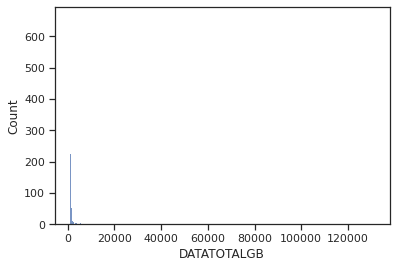

In [36]:
sns.histplot(data=df, x='DATATOTALGB')

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
mm_scaler = MinMaxScaler()

In [39]:
df.describe()

,CONTRATO,MSISDN_DD,AR_SSCRBR_DD,CSTMR_CD,DATADOWNGB,DATAUPGB,TIEMPO_ACTIVACION,VELOCIDAD,PD_VC_FEE,LATITUD,LONGITUD,ABUSADOR,DATATOTALGB,exp_DATATOTALGB
count,4.318000e+03,4.318000e+03,4.318000e+03,4.318000e+03,4318.000000,4318.000000,4318.000000,4318.000000,4318.000000,4247.000000,4247.000000,4318.000000,4318.000000,4.318000e+03
mean,2.587863e+06,1.228272e+07,4.738842e+07,-6.210046e+05,1689.132939,109.776130,2325.447429,32.038212,634.318877,14.618530,-90.620634,0.057897,1798.909069,1.083825e+52
std,8.403677e+05,1.852180e+05,1.527295e+07,3.742503e+05,3532.891038,274.252863,6800.854668,25.097912,622.651569,1.620466,1.667637,0.233576,3778.542214,7.121975e+53
min,9.592000e+05,1.200006e+07,1.960811e+07,-1.236180e+06,60.600000,0.450000,167.000000,2.000000,142.860000,-90.323900,-91.881600,0.000000,1000.010000,2.655339e+00
25%,1.823673e+06,1.211675e+07,3.266250e+07,-9.484085e+05,1020.165000,33.617500,601.000000,20.000000,258.930000,14.550850,-90.599100,0.000000,1074.347500,2.855273e+00
50%,2.637537e+06,1.227630e+07,4.795028e+07,-6.418455e+05,1122.985000,49.865000,1142.000000,20.000000,312.500000,14.614400,-90.550800,0.000000,1183.565000,3.176644e+00
75%,3.354215e+06,1.241790e+07,6.101812e+07,-2.863752e+05,1341.727500,86.777500,1888.000000,40.000000,847.320000,14.659300,-90.500000,0.000000,1415.645000,3.984715e+00
max,3.928571e+06,1.266451e+07,7.255862e+07,9.849800e+05,121806.160000,9455.760000,44316.000000,100.000000,2232.140000,15.734600,15.104300,1.000000,131261.920000,4.679956e+55


In [40]:
col_name = 'DATATOTALGB'
trans_col_name = 'DATATOTALGB_mm'
df[trans_col_name]= mm_scaler.fit_transform(df[[col_name]])

In [226]:
col_name = 'DATATOTALGB'
trans_col_name = 'DATATOTALGB_mm'

df_test[trans_col_name]= mm_scaler.fit_transform(df_test[[col_name]])

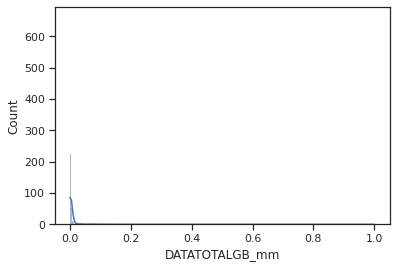

In [41]:
sns.histplot(data=df, x=trans_col_name, kde=True)

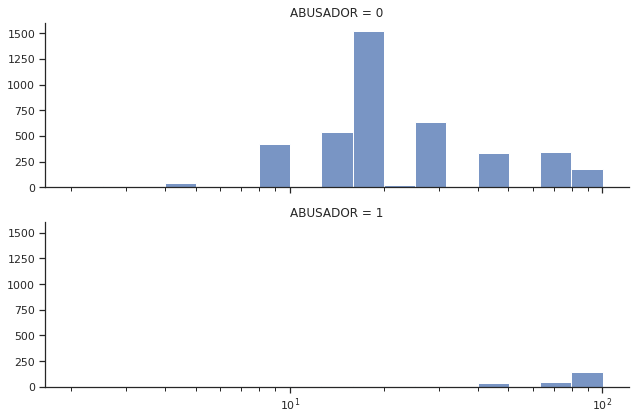

In [42]:
g = sns.FacetGrid(df[['VELOCIDAD','ABUSADOR']], row='ABUSADOR', height=3, aspect=3)
g.map_dataframe(sns.histplot, x='VELOCIDAD',  log_scale=True, binwidth=0.1)

Explorando Relaciones entre predictores categóricos

In [43]:
from statsmodels.graphics.mosaicplot import mosaic

In [44]:
dd_df = df[['VELOCIDAD_MB','DEPARTAMENTO']]

In [45]:
def return_emtpy(x):
  return ''

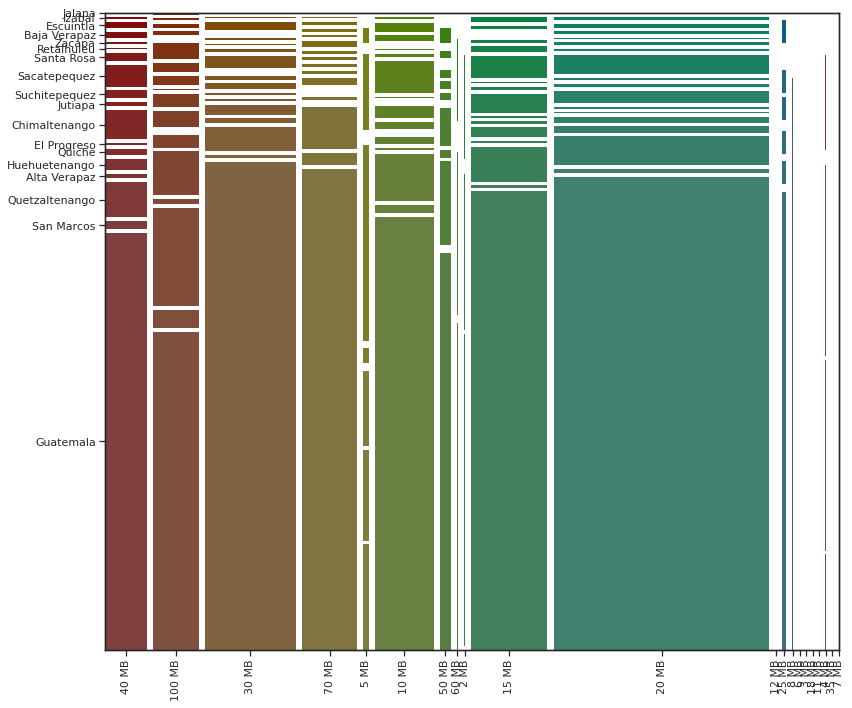

In [46]:
fig, ax = plt.subplots(figsize=(12,10))
#plt.figure(figsize=(6,6))
mosaic_fig = mosaic(dd_df,['VELOCIDAD_MB','DEPARTAMENTO'], ax=ax, labelizer=return_emtpy, label_rotation=[90,0], gap=0.01)
plt.tight_layout()

#Tarea Semana 3
#Experimentación con Transformaciones de Datos Numéricos y Categóricos



In [47]:
!pip install category_encoders

     |████████████████████████████████| 81kB 5.7MB/s 


## IMPUNTACION NULOS

In [255]:
df_test

,CONTRATO,MSISDN_DD,AR_SSCRBR_DD,CSTMR_CD,DATADOWNGB,DATAUPGB,MES,BS_UN_NM,AR_ST_NM,TIEMPO_ACTIVACION,VELOCIDAD,PD_VC_FEE,PRSN_TP_CD,CSTMR_DOC,GNDR,RGU_F,NODO,DEPARTAMENTO,MUNICIPIO,LATITUD,LONGITUD,ABUSADOR,DATATOTALGB,exp_DATATOTALGB,VELOCIDAD_MB,DATATOTALGB_mm
0,3634412,12470585,66232226,-1072472,12967.99,623.29,02/2021,HOME,ACTIVO,440,20,223.21,P,2485440981229,M,Y,SJ3137A,Guatemala,San Juan Sacatepequez (Ciudad Quetzal),14.7017,-90.5873,1,13591.28,581132.680203,20 MB,0.061379
1,3906447,12699367,74344087,-1224226,3107.86,250.71,02/2021,HOME,ACTIVO,101,10,196.43,P,2377030410101,F,Y,SP3434A,Guatemala,San Pedro Sacatepequez,14.6849,-90.6073,1,3358.57,26.571880,10 MB,0.011495
2,4059179,12705673,74505705,-1315259,2569.87,582.63,02/2021,HOME,ACTIVO,96,35,339.29,P,1627991790608,M,Y,CV6414A,Sacatepequez,Ciudad Vieja,14.5279,-90.7512,1,3152.50,21.728251,35 MB,0.010491
3,4056952,12704991,74471357,-1314096,6913.31,613.61,02/2021,HOME,ACTIVO,95,25,303.57,P,1952375440110,F,Y,SJ2929A,Guatemala,San Juan Sacatepequez,14.7161,-90.6427,1,7526.92,1556.986985,25 MB,0.031816
4,4052202,12703257,74385749,-1311281,4042.70,567.23,02/2021,HOME,ACTIVO,97,70,758.93,P,2732433141204,M,Y,SM8963A,San Marcos,San Marcos,14.9664,-91.7961,1,4609.93,90.186952,70 MB,0.017596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3586631,12458739,65483206,-1050278,982.26,28.71,02/2021,HOME,ACTIVO,477,20,223.21,P,2220320301413,F,Y,TO5349A,Guatemala,Capital,14.5842,-90.4967,0,1010.97,2.683912,20 MB,0.000051
996,3586709,12458675,65483925,-1050314,2209.16,187.87,02/2021,HOME,ACTIVO,478,15,178.57,P,2940550022207,M,Y,SJ3336A,Guatemala,San Juan Sacatepequez (Ciudad Quetzal),14.6922,-90.5910,0,2397.03,10.390060,15 MB,0.006808
997,3588250,12458934,65519879,-1050931,1076.67,36.77,02/2021,HOME,ACTIVO,465,20,223.21,P,1926818501008,F,Y,MP7344A,Guatemala,Villa Canales,14.4783,-90.5360,0,1113.44,2.966384,20 MB,0.000551
998,3586794,12458747,65484845,-1050349,1414.65,48.53,02/2021,HOME,ACTIVO,477,15,178.57,P,3207726590501,M,Y,PP8854A,Escuintla,Escuintla,14.3009,-90.7589,0,1463.18,4.174050,15 MB,0.002256


In [48]:
df['LATITUD'].fillna(0, inplace=True)
df['LONGITUD'].fillna(0, inplace=True)


In [49]:
df.isnull().sum(axis = 0)

CONTRATO              0
MSISDN_DD             0
AR_SSCRBR_DD          0
CSTMR_CD              0
DATADOWNGB            0
DATAUPGB              0
MES                   0
BS_UN_NM              0
AR_ST_NM              0
TIEMPO_ACTIVACION     0
VELOCIDAD             0
PD_VC_FEE             0
PRSN_TP_CD            0
CSTMR_DOC             0
GNDR                  0
RGU_F                 0
NODO                 71
DEPARTAMENTO         71
MUNICIPIO            71
LATITUD               0
LONGITUD              0
ABUSADOR              0
VELOCIDAD_MB          0
DATATOTALGB           0
exp_DATATOTALGB       0
DATATOTALGB_mm        0
dtype: int64

Se corrobora que no existen columnas con valores nulos.

### One-Hot Encoder

In [50]:
from category_encoders import OneHotEncoder

In [256]:
col = 'BS_UN_NM'

In [52]:
onehot_enc= OneHotEncoder(use_cat_names=True)
bs_un_nm_ohe = onehot_enc.fit_transform(df[col])

df = pd.concat([df, bs_un_nm_ohe], axis=1)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



In [257]:
onehot_enc= OneHotEncoder(use_cat_names=True)
bs_un_nm_ohe = onehot_enc.fit_transform(df_test[col])

df_test = pd.concat([df_test, bs_un_nm_ohe], axis=1)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



In [258]:
df_test

,CONTRATO,MSISDN_DD,AR_SSCRBR_DD,CSTMR_CD,DATADOWNGB,DATAUPGB,MES,BS_UN_NM,AR_ST_NM,TIEMPO_ACTIVACION,VELOCIDAD,PD_VC_FEE,PRSN_TP_CD,CSTMR_DOC,GNDR,RGU_F,NODO,DEPARTAMENTO,MUNICIPIO,LATITUD,LONGITUD,ABUSADOR,DATATOTALGB,exp_DATATOTALGB,VELOCIDAD_MB,DATATOTALGB_mm,BS_UN_NM_HOME,BS_UN_NM_CORPORATE
0,3634412,12470585,66232226,-1072472,12967.99,623.29,02/2021,HOME,ACTIVO,440,20,223.21,P,2485440981229,M,Y,SJ3137A,Guatemala,San Juan Sacatepequez (Ciudad Quetzal),14.7017,-90.5873,1,13591.28,581132.680203,20 MB,0.061379,1,0
1,3906447,12699367,74344087,-1224226,3107.86,250.71,02/2021,HOME,ACTIVO,101,10,196.43,P,2377030410101,F,Y,SP3434A,Guatemala,San Pedro Sacatepequez,14.6849,-90.6073,1,3358.57,26.571880,10 MB,0.011495,1,0
2,4059179,12705673,74505705,-1315259,2569.87,582.63,02/2021,HOME,ACTIVO,96,35,339.29,P,1627991790608,M,Y,CV6414A,Sacatepequez,Ciudad Vieja,14.5279,-90.7512,1,3152.50,21.728251,35 MB,0.010491,1,0
3,4056952,12704991,74471357,-1314096,6913.31,613.61,02/2021,HOME,ACTIVO,95,25,303.57,P,1952375440110,F,Y,SJ2929A,Guatemala,San Juan Sacatepequez,14.7161,-90.6427,1,7526.92,1556.986985,25 MB,0.031816,1,0
4,4052202,12703257,74385749,-1311281,4042.70,567.23,02/2021,HOME,ACTIVO,97,70,758.93,P,2732433141204,M,Y,SM8963A,San Marcos,San Marcos,14.9664,-91.7961,1,4609.93,90.186952,70 MB,0.017596,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3586631,12458739,65483206,-1050278,982.26,28.71,02/2021,HOME,ACTIVO,477,20,223.21,P,2220320301413,F,Y,TO5349A,Guatemala,Capital,14.5842,-90.4967,0,1010.97,2.683912,20 MB,0.000051,1,0
996,3586709,12458675,65483925,-1050314,2209.16,187.87,02/2021,HOME,ACTIVO,478,15,178.57,P,2940550022207,M,Y,SJ3336A,Guatemala,San Juan Sacatepequez (Ciudad Quetzal),14.6922,-90.5910,0,2397.03,10.390060,15 MB,0.006808,1,0
997,3588250,12458934,65519879,-1050931,1076.67,36.77,02/2021,HOME,ACTIVO,465,20,223.21,P,1926818501008,F,Y,MP7344A,Guatemala,Villa Canales,14.4783,-90.5360,0,1113.44,2.966384,20 MB,0.000551,1,0
998,3586794,12458747,65484845,-1050349,1414.65,48.53,02/2021,HOME,ACTIVO,477,15,178.57,P,3207726590501,M,Y,PP8854A,Escuintla,Escuintla,14.3009,-90.7589,0,1463.18,4.174050,15 MB,0.002256,1,0


In [53]:
print(df)

      CONTRATO  MSISDN_DD  ...  BS_UN_NM_HOME  BS_UN_NM_CORPORATE
0       966229   12224893  ...              1                   0
1      3926793   12663376  ...              1                   0
2      3924742   12664506  ...              1                   0
3      3904070   12657723  ...              1                   0
4      3875960   12651742  ...              1                   0
...        ...        ...  ...            ...                 ...
4313   3928571   12662681  ...              1                   0
4314   3922369   12662287  ...              1                   0
4315   3919195   12662134  ...              1                   0
4316   3917375   12662637  ...              1                   0
4317   3920252   12663201  ...              1                   0

[4318 rows x 28 columns]


Con One-Hot Encoding , la representación de matrices de vectores binarios permite que un algoritmo de aprendizaje automático aproveche la información contenida en un valor de categoría sin la confusión causada por la ordinalidad .

## Robust Scaling

In [54]:
from sklearn.preprocessing import RobustScaler

In [230]:
rb_scaler= RobustScaler()
col_name = 'VELOCIDAD'
trans_col_name = 'VELOCIDAD_RB'
df[trans_col_name]= rb_scaler.fit_transform(df[[col_name]])

In [259]:
rb_scaler= RobustScaler()
col_name = 'VELOCIDAD'
trans_col_name = 'VELOCIDAD_RB'
df_test[trans_col_name]= rb_scaler.fit_transform(df_test[[col_name]])

In [260]:
df_test

,CONTRATO,MSISDN_DD,AR_SSCRBR_DD,CSTMR_CD,DATADOWNGB,DATAUPGB,MES,BS_UN_NM,AR_ST_NM,TIEMPO_ACTIVACION,VELOCIDAD,PD_VC_FEE,PRSN_TP_CD,CSTMR_DOC,GNDR,RGU_F,NODO,DEPARTAMENTO,MUNICIPIO,LATITUD,LONGITUD,ABUSADOR,DATATOTALGB,exp_DATATOTALGB,VELOCIDAD_MB,DATATOTALGB_mm,BS_UN_NM_HOME,BS_UN_NM_CORPORATE,VELOCIDAD_RB
0,3634412,12470585,66232226,-1072472,12967.99,623.29,02/2021,HOME,ACTIVO,440,20,223.21,P,2485440981229,M,Y,SJ3137A,Guatemala,San Juan Sacatepequez (Ciudad Quetzal),14.7017,-90.5873,1,13591.28,581132.680203,20 MB,0.061379,1,0,0.0
1,3906447,12699367,74344087,-1224226,3107.86,250.71,02/2021,HOME,ACTIVO,101,10,196.43,P,2377030410101,F,Y,SP3434A,Guatemala,San Pedro Sacatepequez,14.6849,-90.6073,1,3358.57,26.571880,10 MB,0.011495,1,0,-1.0
2,4059179,12705673,74505705,-1315259,2569.87,582.63,02/2021,HOME,ACTIVO,96,35,339.29,P,1627991790608,M,Y,CV6414A,Sacatepequez,Ciudad Vieja,14.5279,-90.7512,1,3152.50,21.728251,35 MB,0.010491,1,0,1.5
3,4056952,12704991,74471357,-1314096,6913.31,613.61,02/2021,HOME,ACTIVO,95,25,303.57,P,1952375440110,F,Y,SJ2929A,Guatemala,San Juan Sacatepequez,14.7161,-90.6427,1,7526.92,1556.986985,25 MB,0.031816,1,0,0.5
4,4052202,12703257,74385749,-1311281,4042.70,567.23,02/2021,HOME,ACTIVO,97,70,758.93,P,2732433141204,M,Y,SM8963A,San Marcos,San Marcos,14.9664,-91.7961,1,4609.93,90.186952,70 MB,0.017596,1,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3586631,12458739,65483206,-1050278,982.26,28.71,02/2021,HOME,ACTIVO,477,20,223.21,P,2220320301413,F,Y,TO5349A,Guatemala,Capital,14.5842,-90.4967,0,1010.97,2.683912,20 MB,0.000051,1,0,0.0
996,3586709,12458675,65483925,-1050314,2209.16,187.87,02/2021,HOME,ACTIVO,478,15,178.57,P,2940550022207,M,Y,SJ3336A,Guatemala,San Juan Sacatepequez (Ciudad Quetzal),14.6922,-90.5910,0,2397.03,10.390060,15 MB,0.006808,1,0,-0.5
997,3588250,12458934,65519879,-1050931,1076.67,36.77,02/2021,HOME,ACTIVO,465,20,223.21,P,1926818501008,F,Y,MP7344A,Guatemala,Villa Canales,14.4783,-90.5360,0,1113.44,2.966384,20 MB,0.000551,1,0,0.0
998,3586794,12458747,65484845,-1050349,1414.65,48.53,02/2021,HOME,ACTIVO,477,15,178.57,P,3207726590501,M,Y,PP8854A,Escuintla,Escuintla,14.3009,-90.7589,0,1463.18,4.174050,15 MB,0.002256,1,0,-0.5


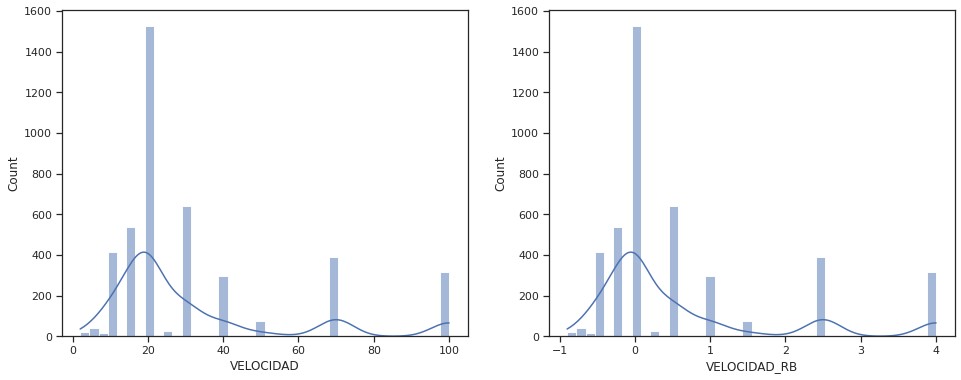

In [56]:
fig, axes = plt.subplots(ncols=2, figsize= (16,6))
sns.histplot(data=df, x=col_name, ax=axes[0], kde=True)
sns.histplot(data=df, x=trans_col_name, ax=axes[1], kde=True)

Se probó este metodo ya que el atributo VELOCIDAD cuenta con valores atípicos.

##Binarization

In [57]:
from sklearn.preprocessing import Binarizer

In [58]:
binazer= Binarizer(threshold=6)
col_name = 'VELOCIDAD'
trans_col_name = 'VELOCIDAD_BIN'
df[trans_col_name]= binazer.fit_transform(df[[col_name]])

In [283]:
binazer= Binarizer(threshold=6)
col_name = 'VELOCIDAD'
trans_col_name = 'VELOCIDAD_BIN'
df_test[trans_col_name]= binazer.fit_transform(df_test[[col_name]])

In [284]:
df_test

,CONTRATO,MSISDN_DD,AR_SSCRBR_DD,CSTMR_CD,DATADOWNGB,DATAUPGB,MES,BS_UN_NM,AR_ST_NM,TIEMPO_ACTIVACION,VELOCIDAD,PD_VC_FEE,PRSN_TP_CD,CSTMR_DOC,GNDR,RGU_F,NODO,DEPARTAMENTO,MUNICIPIO,LATITUD,LONGITUD,ABUSADOR,DATATOTALGB,exp_DATATOTALGB,VELOCIDAD_MB,DATATOTALGB_mm,BS_UN_NM_HOME,BS_UN_NM_CORPORATE,VELOCIDAD_RB,GNDR_0,GNDR_1,GNDR_2,DEPARTAMENTO_ORD,ST_ACTIVO,ST_PREVIA SUSPENSION - MENSAJE FACT. VENC.,ST_PROPUESTO A CORTE,ST_SUSPENDIDO POR SALDO ANTERIOR,MUNICIPIO_ORD,NODO_ORD,MUNICIPIO_FREQ,DATATOTALGB_nm,VELOCIDAD_BIN
0,3634412,12470585,66232226,-1072472,12967.99,623.29,02/2021,HOME,ACTIVO,440,20,223.21,P,2485440981229,M,Y,SJ3137A,Guatemala,San Juan Sacatepequez (Ciudad Quetzal),14.7017,-90.5873,1,13591.28,581132.680203,20 MB,0.061379,1,0,0.0,0,0,1,1,1,0,0,0,30.0,89.0,229,0.061379,1
1,3906447,12699367,74344087,-1224226,3107.86,250.71,02/2021,HOME,ACTIVO,101,10,196.43,P,2377030410101,F,Y,SP3434A,Guatemala,San Pedro Sacatepequez,14.6849,-90.6073,1,3358.57,26.571880,10 MB,0.011495,1,0,-1.0,0,1,0,1,1,0,0,0,37.0,-1.0,106,0.011495,1
2,4059179,12705673,74505705,-1315259,2569.87,582.63,02/2021,HOME,ACTIVO,96,35,339.29,P,1627991790608,M,Y,CV6414A,Sacatepequez,Ciudad Vieja,14.5279,-90.7512,1,3152.50,21.728251,35 MB,0.010491,1,0,1.5,0,0,1,11,1,0,0,0,-1.0,-1.0,49,0.010491,1
3,4056952,12704991,74471357,-1314096,6913.31,613.61,02/2021,HOME,ACTIVO,95,25,303.57,P,1952375440110,F,Y,SJ2929A,Guatemala,San Juan Sacatepequez,14.7161,-90.6427,1,7526.92,1556.986985,25 MB,0.031816,1,0,0.5,0,1,0,1,1,0,0,0,7.0,25.0,88,0.031816,1
4,4052202,12703257,74385749,-1311281,4042.70,567.23,02/2021,HOME,ACTIVO,97,70,758.93,P,2732433141204,M,Y,SM8963A,San Marcos,San Marcos,14.9664,-91.7961,1,4609.93,90.186952,70 MB,0.017596,1,0,5.0,0,0,1,2,1,0,0,0,2.0,40.0,4,0.017596,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3586631,12458739,65483206,-1050278,982.26,28.71,02/2021,HOME,ACTIVO,477,20,223.21,P,2220320301413,F,Y,TO5349A,Guatemala,Capital,14.5842,-90.4967,0,1010.97,2.683912,20 MB,0.000051,1,0,0.0,0,1,0,1,1,0,0,0,19.0,718.0,46,0.000051,1
996,3586709,12458675,65483925,-1050314,2209.16,187.87,02/2021,HOME,ACTIVO,478,15,178.57,P,2940550022207,M,Y,SJ3336A,Guatemala,San Juan Sacatepequez (Ciudad Quetzal),14.6922,-90.5910,0,2397.03,10.390060,15 MB,0.006808,1,0,-0.5,0,0,1,1,1,0,0,0,30.0,870.0,229,0.006808,1
997,3588250,12458934,65519879,-1050931,1076.67,36.77,02/2021,HOME,ACTIVO,465,20,223.21,P,1926818501008,F,Y,MP7344A,Guatemala,Villa Canales,14.4783,-90.5360,0,1113.44,2.966384,20 MB,0.000551,1,0,0.0,0,1,0,1,1,0,0,0,26.0,173.0,2,0.000551,1
998,3586794,12458747,65484845,-1050349,1414.65,48.53,02/2021,HOME,ACTIVO,477,15,178.57,P,3207726590501,M,Y,PP8854A,Escuintla,Escuintla,14.3009,-90.7589,0,1463.18,4.174050,15 MB,0.002256,1,0,-0.5,0,0,1,17,1,0,0,0,45.0,-1.0,3,0.002256,1


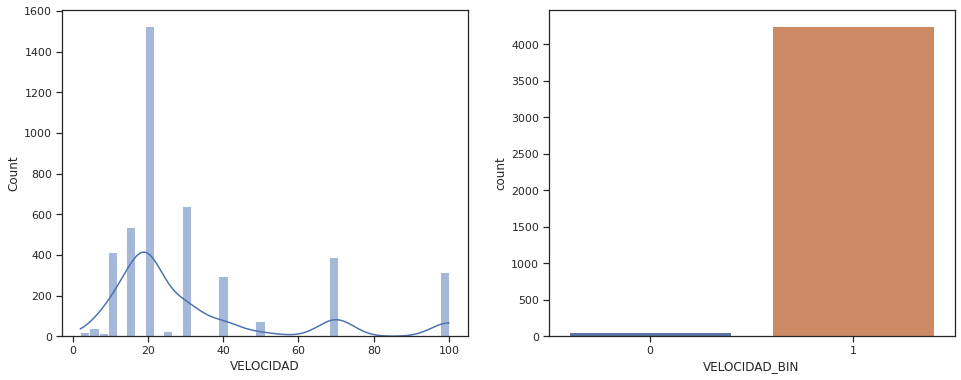

In [59]:
fig, axes = plt.subplots(ncols=2, figsize= (16,6))
sns.histplot(data=df, x=col_name, ax=axes[0], kde=True)
sns.countplot(x=df[trans_col_name])

Se obtienen una nueva feature boleana con 0 y 1 basada en una columna numerica.

**Binary Encoder**

In [189]:
from category_encoders import BinaryEncoder
binary_encorder = BinaryEncoder()
col_name='GNDR'

In [61]:
GNDR_BE= binary_encorder.fit_transform(df[[col_name]])
df = pd.concat([df, GNDR_BE], axis=1)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



In [261]:
col_name='GNDR'
GNDR_BE2= binary_encorder.fit_transform(df_test[[col_name]])
df_test = pd.concat([df_test, GNDR_BE2], axis=1)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



In [262]:
df_test

,CONTRATO,MSISDN_DD,AR_SSCRBR_DD,CSTMR_CD,DATADOWNGB,DATAUPGB,MES,BS_UN_NM,AR_ST_NM,TIEMPO_ACTIVACION,VELOCIDAD,PD_VC_FEE,PRSN_TP_CD,CSTMR_DOC,GNDR,RGU_F,NODO,DEPARTAMENTO,MUNICIPIO,LATITUD,LONGITUD,ABUSADOR,DATATOTALGB,exp_DATATOTALGB,VELOCIDAD_MB,DATATOTALGB_mm,BS_UN_NM_HOME,BS_UN_NM_CORPORATE,VELOCIDAD_RB,GNDR_0,GNDR_1,GNDR_2
0,3634412,12470585,66232226,-1072472,12967.99,623.29,02/2021,HOME,ACTIVO,440,20,223.21,P,2485440981229,M,Y,SJ3137A,Guatemala,San Juan Sacatepequez (Ciudad Quetzal),14.7017,-90.5873,1,13591.28,581132.680203,20 MB,0.061379,1,0,0.0,0,0,1
1,3906447,12699367,74344087,-1224226,3107.86,250.71,02/2021,HOME,ACTIVO,101,10,196.43,P,2377030410101,F,Y,SP3434A,Guatemala,San Pedro Sacatepequez,14.6849,-90.6073,1,3358.57,26.571880,10 MB,0.011495,1,0,-1.0,0,1,0
2,4059179,12705673,74505705,-1315259,2569.87,582.63,02/2021,HOME,ACTIVO,96,35,339.29,P,1627991790608,M,Y,CV6414A,Sacatepequez,Ciudad Vieja,14.5279,-90.7512,1,3152.50,21.728251,35 MB,0.010491,1,0,1.5,0,0,1
3,4056952,12704991,74471357,-1314096,6913.31,613.61,02/2021,HOME,ACTIVO,95,25,303.57,P,1952375440110,F,Y,SJ2929A,Guatemala,San Juan Sacatepequez,14.7161,-90.6427,1,7526.92,1556.986985,25 MB,0.031816,1,0,0.5,0,1,0
4,4052202,12703257,74385749,-1311281,4042.70,567.23,02/2021,HOME,ACTIVO,97,70,758.93,P,2732433141204,M,Y,SM8963A,San Marcos,San Marcos,14.9664,-91.7961,1,4609.93,90.186952,70 MB,0.017596,1,0,5.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3586631,12458739,65483206,-1050278,982.26,28.71,02/2021,HOME,ACTIVO,477,20,223.21,P,2220320301413,F,Y,TO5349A,Guatemala,Capital,14.5842,-90.4967,0,1010.97,2.683912,20 MB,0.000051,1,0,0.0,0,1,0
996,3586709,12458675,65483925,-1050314,2209.16,187.87,02/2021,HOME,ACTIVO,478,15,178.57,P,2940550022207,M,Y,SJ3336A,Guatemala,San Juan Sacatepequez (Ciudad Quetzal),14.6922,-90.5910,0,2397.03,10.390060,15 MB,0.006808,1,0,-0.5,0,0,1
997,3588250,12458934,65519879,-1050931,1076.67,36.77,02/2021,HOME,ACTIVO,465,20,223.21,P,1926818501008,F,Y,MP7344A,Guatemala,Villa Canales,14.4783,-90.5360,0,1113.44,2.966384,20 MB,0.000551,1,0,0.0,0,1,0
998,3586794,12458747,65484845,-1050349,1414.65,48.53,02/2021,HOME,ACTIVO,477,15,178.57,P,3207726590501,M,Y,PP8854A,Escuintla,Escuintla,14.3009,-90.7589,0,1463.18,4.174050,15 MB,0.002256,1,0,-0.5,0,0,1


In [62]:
binary_encorder.base_n_encoder.mapping[0]['mapping']

,GNDR_0,GNDR_1,GNDR_2
1,0,0,1
2,0,1,0
3,0,1,1
-1,0,0,0
-2,0,0,0


Se realizó la codificación binaria para el genero de las personas, en el cual se observa si el campo tiene un dato nulo, se codifica como 001, si el genero es M (masculino) se  codifica como un campo 010 y si el sexo es femenino se codifica como el 011

# El objetivo era transformar la variable categorica de departamento, conviertiendola en ordinal utilizando el metodo de Ordinal Encoder.


In [63]:
from category_encoders import OrdinalEncoder

In [264]:
ord_enc=OrdinalEncoder()
col= 'DEPARTAMENTO'

In [265]:
df['DEPARTAMENTO'].value_counts()


Guatemala         3322
Quetzaltenango     293
Sacatepequez       134
Chimaltenango       95
Huehuetenango       78
San Marcos          59
Escuintla           36
El Progreso         33
Alta Verapaz        32
Santa Rosa          29
Jutiapa             29
Retalhuleu          25
Izabal              20
Baja Verapaz        18
Quiche              17
Suchitepequez       16
Zacapa               9
Jalapa               2
Name: DEPARTAMENTO, dtype: int64

In [266]:
col= 'DEPARTAMENTO'
df['DEPARTAMENTO_ORD']=ord_enc.fit_transform(df[[col]])
df_test['DEPARTAMENTO_ORD']=ord_enc.fit_transform(df_test[[col]])

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



In [267]:
df_test




,CONTRATO,MSISDN_DD,AR_SSCRBR_DD,CSTMR_CD,DATADOWNGB,DATAUPGB,MES,BS_UN_NM,AR_ST_NM,TIEMPO_ACTIVACION,VELOCIDAD,PD_VC_FEE,PRSN_TP_CD,CSTMR_DOC,GNDR,RGU_F,NODO,DEPARTAMENTO,MUNICIPIO,LATITUD,LONGITUD,ABUSADOR,DATATOTALGB,exp_DATATOTALGB,VELOCIDAD_MB,DATATOTALGB_mm,BS_UN_NM_HOME,BS_UN_NM_CORPORATE,VELOCIDAD_RB,GNDR_0,GNDR_1,GNDR_2,DEPARTAMENTO_ORD
0,3634412,12470585,66232226,-1072472,12967.99,623.29,02/2021,HOME,ACTIVO,440,20,223.21,P,2485440981229,M,Y,SJ3137A,Guatemala,San Juan Sacatepequez (Ciudad Quetzal),14.7017,-90.5873,1,13591.28,581132.680203,20 MB,0.061379,1,0,0.0,0,0,1,1
1,3906447,12699367,74344087,-1224226,3107.86,250.71,02/2021,HOME,ACTIVO,101,10,196.43,P,2377030410101,F,Y,SP3434A,Guatemala,San Pedro Sacatepequez,14.6849,-90.6073,1,3358.57,26.571880,10 MB,0.011495,1,0,-1.0,0,1,0,1
2,4059179,12705673,74505705,-1315259,2569.87,582.63,02/2021,HOME,ACTIVO,96,35,339.29,P,1627991790608,M,Y,CV6414A,Sacatepequez,Ciudad Vieja,14.5279,-90.7512,1,3152.50,21.728251,35 MB,0.010491,1,0,1.5,0,0,1,11
3,4056952,12704991,74471357,-1314096,6913.31,613.61,02/2021,HOME,ACTIVO,95,25,303.57,P,1952375440110,F,Y,SJ2929A,Guatemala,San Juan Sacatepequez,14.7161,-90.6427,1,7526.92,1556.986985,25 MB,0.031816,1,0,0.5,0,1,0,1
4,4052202,12703257,74385749,-1311281,4042.70,567.23,02/2021,HOME,ACTIVO,97,70,758.93,P,2732433141204,M,Y,SM8963A,San Marcos,San Marcos,14.9664,-91.7961,1,4609.93,90.186952,70 MB,0.017596,1,0,5.0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3586631,12458739,65483206,-1050278,982.26,28.71,02/2021,HOME,ACTIVO,477,20,223.21,P,2220320301413,F,Y,TO5349A,Guatemala,Capital,14.5842,-90.4967,0,1010.97,2.683912,20 MB,0.000051,1,0,0.0,0,1,0,1
996,3586709,12458675,65483925,-1050314,2209.16,187.87,02/2021,HOME,ACTIVO,478,15,178.57,P,2940550022207,M,Y,SJ3336A,Guatemala,San Juan Sacatepequez (Ciudad Quetzal),14.6922,-90.5910,0,2397.03,10.390060,15 MB,0.006808,1,0,-0.5,0,0,1,1
997,3588250,12458934,65519879,-1050931,1076.67,36.77,02/2021,HOME,ACTIVO,465,20,223.21,P,1926818501008,F,Y,MP7344A,Guatemala,Villa Canales,14.4783,-90.5360,0,1113.44,2.966384,20 MB,0.000551,1,0,0.0,0,1,0,1
998,3586794,12458747,65484845,-1050349,1414.65,48.53,02/2021,HOME,ACTIVO,477,15,178.57,P,3207726590501,M,Y,PP8854A,Escuintla,Escuintla,14.3009,-90.7589,0,1463.18,4.174050,15 MB,0.002256,1,0,-0.5,0,0,1,17


In [67]:
ord_enc.mapping[0]['mapping']


Guatemala          1
San Marcos         2
Quetzaltenango     3
Alta Verapaz       4
Huehuetenango      5
Quiche             6
El Progreso        7
Chimaltenango      8
Jutiapa            9
Suchitepequez     10
Sacatepequez      11
Santa Rosa        12
Retalhuleu        13
Zacapa            14
Baja Verapaz      15
NaN               16
Escuintla         17
Izabal            18
Jalapa            19
dtype: int64

# El resultado de la transformación usando el default y mas adelante ver como queda usando un diccionario de departamentos


In [195]:


dep_dict={None:0, 'Suchitepequez':1,'Jutiapa':2,'Baja Verapaz':3,'Quetzaltenango':4,'Quiche':5,'Alta Verapaz':6,
          'El Progreso':7,'Guatemala':8,'Retalhuleu':9,'San Marcos':10,'Santa Rosa':11,'Sacatepequez':12,
          'Huehuetenango':13,'Chimaltenango':14,'Zacapa':15,'Izabal':16,'Escuila':17,'dep_missing':-1  }
col_dep_dict={'col':'DEPARTAMENTO','mapping':dep_dict}

In [196]:
ord_enc=OrdinalEncoder(mapping=[col_dep_dict])

In [263]:
preds_nt

['DATADOWNGB',
 'BS_UN_NM_HOME',
 'BS_UN_NM_CORPORATE',
 'VELOCIDAD_RB',
 'VELOCIDAD_BIN',
 'GNDR_1',
 'GNDR_2',
 'DEPARTAMENTO_ORD',
 'MUNICIPIO_ORD',
 'NODO_ORD',
 'MUNICIPIO_FREQ']

In [268]:
df_test

,CONTRATO,MSISDN_DD,AR_SSCRBR_DD,CSTMR_CD,DATADOWNGB,DATAUPGB,MES,BS_UN_NM,AR_ST_NM,TIEMPO_ACTIVACION,VELOCIDAD,PD_VC_FEE,PRSN_TP_CD,CSTMR_DOC,GNDR,RGU_F,NODO,DEPARTAMENTO,MUNICIPIO,LATITUD,LONGITUD,ABUSADOR,DATATOTALGB,exp_DATATOTALGB,VELOCIDAD_MB,DATATOTALGB_mm,BS_UN_NM_HOME,BS_UN_NM_CORPORATE,VELOCIDAD_RB,GNDR_0,GNDR_1,GNDR_2,DEPARTAMENTO_ORD
0,3634412,12470585,66232226,-1072472,12967.99,623.29,02/2021,HOME,ACTIVO,440,20,223.21,P,2485440981229,M,Y,SJ3137A,Guatemala,San Juan Sacatepequez (Ciudad Quetzal),14.7017,-90.5873,1,13591.28,581132.680203,20 MB,0.061379,1,0,0.0,0,0,1,1
1,3906447,12699367,74344087,-1224226,3107.86,250.71,02/2021,HOME,ACTIVO,101,10,196.43,P,2377030410101,F,Y,SP3434A,Guatemala,San Pedro Sacatepequez,14.6849,-90.6073,1,3358.57,26.571880,10 MB,0.011495,1,0,-1.0,0,1,0,1
2,4059179,12705673,74505705,-1315259,2569.87,582.63,02/2021,HOME,ACTIVO,96,35,339.29,P,1627991790608,M,Y,CV6414A,Sacatepequez,Ciudad Vieja,14.5279,-90.7512,1,3152.50,21.728251,35 MB,0.010491,1,0,1.5,0,0,1,11
3,4056952,12704991,74471357,-1314096,6913.31,613.61,02/2021,HOME,ACTIVO,95,25,303.57,P,1952375440110,F,Y,SJ2929A,Guatemala,San Juan Sacatepequez,14.7161,-90.6427,1,7526.92,1556.986985,25 MB,0.031816,1,0,0.5,0,1,0,1
4,4052202,12703257,74385749,-1311281,4042.70,567.23,02/2021,HOME,ACTIVO,97,70,758.93,P,2732433141204,M,Y,SM8963A,San Marcos,San Marcos,14.9664,-91.7961,1,4609.93,90.186952,70 MB,0.017596,1,0,5.0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3586631,12458739,65483206,-1050278,982.26,28.71,02/2021,HOME,ACTIVO,477,20,223.21,P,2220320301413,F,Y,TO5349A,Guatemala,Capital,14.5842,-90.4967,0,1010.97,2.683912,20 MB,0.000051,1,0,0.0,0,1,0,1
996,3586709,12458675,65483925,-1050314,2209.16,187.87,02/2021,HOME,ACTIVO,478,15,178.57,P,2940550022207,M,Y,SJ3336A,Guatemala,San Juan Sacatepequez (Ciudad Quetzal),14.6922,-90.5910,0,2397.03,10.390060,15 MB,0.006808,1,0,-0.5,0,0,1,1
997,3588250,12458934,65519879,-1050931,1076.67,36.77,02/2021,HOME,ACTIVO,465,20,223.21,P,1926818501008,F,Y,MP7344A,Guatemala,Villa Canales,14.4783,-90.5360,0,1113.44,2.966384,20 MB,0.000551,1,0,0.0,0,1,0,1
998,3586794,12458747,65484845,-1050349,1414.65,48.53,02/2021,HOME,ACTIVO,477,15,178.57,P,3207726590501,M,Y,PP8854A,Escuintla,Escuintla,14.3009,-90.7589,0,1463.18,4.174050,15 MB,0.002256,1,0,-0.5,0,0,1,17


In [197]:
ord_enc.mapping[0]['mapping']


{'Alta Verapaz': 6,
 'Baja Verapaz': 3,
 'Chimaltenango': 14,
 'El Progreso': 7,
 'Escuila': 17,
 'Guatemala': 8,
 'Huehuetenango': 13,
 'Izabal': 16,
 'Jutiapa': 2,
 None: 0,
 'Quetzaltenango': 4,
 'Quiche': 5,
 'Retalhuleu': 9,
 'Sacatepequez': 12,
 'San Marcos': 10,
 'Santa Rosa': 11,
 'Suchitepequez': 1,
 'Zacapa': 15,
 'dep_missing': -1}

#  Se utiliza la libreria de pandas para reemplazar el valor de la columna de departamento por el de la variable transformada.

In [269]:
df_scaled = pd.DataFrame(ord_enc.fit_transform(df,mapping=[col_dep_dict]),columns = df.columns)
df_scaled2 = pd.DataFrame(ord_enc.fit_transform(df_test,mapping=[col_dep_dict]),columns = df_test.columns)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [72]:
df_scaled

,CONTRATO,MSISDN_DD,AR_SSCRBR_DD,CSTMR_CD,DATADOWNGB,DATAUPGB,MES,BS_UN_NM,AR_ST_NM,TIEMPO_ACTIVACION,VELOCIDAD,PD_VC_FEE,PRSN_TP_CD,CSTMR_DOC,GNDR,RGU_F,NODO,DEPARTAMENTO,MUNICIPIO,LATITUD,LONGITUD,ABUSADOR,VELOCIDAD_MB,DATATOTALGB,exp_DATATOTALGB,DATATOTALGB_mm,BS_UN_NM_HOME,BS_UN_NM_CORPORATE,VELOCIDAD_RB,VELOCIDAD_BIN,GNDR_0,GNDR_1,GNDR_2,DEPARTAMENTO_ORD
0,966229,12224893,42771774,-646900,3638.40,214.33,11/2020,HOME,ACTIVO,1361,40,1250.00,P,60895,M,Y,MP6535B,8.0,Villa Nueva,14.5202,-90.6008,1,40 MB,3852.73,43.052988,0.021900,1,0,1.0,1,0,0,1,1
1,3926793,12663376,72510954,-1235265,4374.58,308.29,11/2020,HOME,ACTIVO,167,100,2232.14,P,2240838991202,M,Y,SM9063A,10.0,San Marcos,14.9701,-91.8009,1,100 MB,4682.87,96.845336,0.028273,1,0,4.0,1,0,0,1,2
2,3924742,12664506,72488898,-1234158,3170.28,214.94,11/2020,HOME,ACTIVO,172,30,406.25,P,2773150420920,M,Y,CQ4038A,4.0,Coatepeque,14.7026,-91.8762,1,30 MB,3385.22,27.272501,0.018311,1,0,0.5,1,0,0,1,3
3,3904070,12657723,72165521,-1222867,8896.64,576.19,11/2020,HOME,ACTIVO,187,70,1785.71,P,2224990950701,M,Y,QX6590A,4.0,Quetzaltenango,14.8363,-91.5047,1,70 MB,9472.83,10413.002524,0.065044,1,0,2.5,1,0,0,1,3
4,3875960,12651742,71681860,-1207068,5377.29,456.17,11/2020,HOME,ACTIVO,211,40,1250.00,P,3369741320920,M,Y,CQ4141A,4.0,Coatepeque,14.7092,-91.8514,1,40 MB,5833.46,297.894168,0.037106,1,0,1.0,1,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4313,3928571,12662681,72558616,-1236180,1163.82,25.65,11/2020,HOME,ACTIVO,170,10,223.21,P,3067006030601,F,Y,SM8863A,10.0,San Marcos,14.9613,-91.7946,0,10 MB,1189.47,3.195015,0.001454,1,0,-0.5,1,0,1,1,2
4314,3922369,12662287,72470314,-1232919,1246.23,60.64,11/2020,HOME,ACTIVO,171,100,2232.14,P,TBD,M,Y,TO5152B,8.0,Capital,14.5965,-90.4757,0,100 MB,1306.87,3.583143,0.002356,1,0,4.0,1,0,0,1,1
4315,3919195,12662134,72428579,-1231084,1211.77,116.45,11/2020,HOME,ACTIVO,177,10,223.21,P,2608958141301,F,Y,MP7042A,8.0,San Miguel Petapa,14.4954,-90.5529,0,10 MB,1328.22,3.658634,0.002520,1,0,-0.5,1,0,1,1,1
4316,3917375,12662637,72410951,-1230056,1677.17,66.03,11/2020,HOME,ACTIVO,177,20,981.25,P,2307424400101,F,Y,RD4542A,8.0,Capital,14.6288,-90.5507,0,20 MB,1743.20,5.486792,0.005705,1,0,0.0,1,0,1,1,1


In [270]:
dummy_st = pd.get_dummies(df['AR_ST_NM'], prefix='ST', drop_first=False)
dummy_st2 = pd.get_dummies(df_test['AR_ST_NM'], prefix='ST', drop_first=False)
df = pd.concat([df, dummy_st], axis=1)
df_test = pd.concat([df_test, dummy_st2], axis=1)
#df['AR_ST_NM_ORD'] = ord_encoder_st.fit_transform(df[['AR_ST_NM']])


In [271]:
df_test

,CONTRATO,MSISDN_DD,AR_SSCRBR_DD,CSTMR_CD,DATADOWNGB,DATAUPGB,MES,BS_UN_NM,AR_ST_NM,TIEMPO_ACTIVACION,VELOCIDAD,PD_VC_FEE,PRSN_TP_CD,CSTMR_DOC,GNDR,RGU_F,NODO,DEPARTAMENTO,MUNICIPIO,LATITUD,LONGITUD,ABUSADOR,DATATOTALGB,exp_DATATOTALGB,VELOCIDAD_MB,DATATOTALGB_mm,BS_UN_NM_HOME,BS_UN_NM_CORPORATE,VELOCIDAD_RB,GNDR_0,GNDR_1,GNDR_2,DEPARTAMENTO_ORD,ST_ACTIVO,ST_PREVIA SUSPENSION - MENSAJE FACT. VENC.,ST_PROPUESTO A CORTE,ST_SUSPENDIDO POR SALDO ANTERIOR
0,3634412,12470585,66232226,-1072472,12967.99,623.29,02/2021,HOME,ACTIVO,440,20,223.21,P,2485440981229,M,Y,SJ3137A,Guatemala,San Juan Sacatepequez (Ciudad Quetzal),14.7017,-90.5873,1,13591.28,581132.680203,20 MB,0.061379,1,0,0.0,0,0,1,1,1,0,0,0
1,3906447,12699367,74344087,-1224226,3107.86,250.71,02/2021,HOME,ACTIVO,101,10,196.43,P,2377030410101,F,Y,SP3434A,Guatemala,San Pedro Sacatepequez,14.6849,-90.6073,1,3358.57,26.571880,10 MB,0.011495,1,0,-1.0,0,1,0,1,1,0,0,0
2,4059179,12705673,74505705,-1315259,2569.87,582.63,02/2021,HOME,ACTIVO,96,35,339.29,P,1627991790608,M,Y,CV6414A,Sacatepequez,Ciudad Vieja,14.5279,-90.7512,1,3152.50,21.728251,35 MB,0.010491,1,0,1.5,0,0,1,11,1,0,0,0
3,4056952,12704991,74471357,-1314096,6913.31,613.61,02/2021,HOME,ACTIVO,95,25,303.57,P,1952375440110,F,Y,SJ2929A,Guatemala,San Juan Sacatepequez,14.7161,-90.6427,1,7526.92,1556.986985,25 MB,0.031816,1,0,0.5,0,1,0,1,1,0,0,0
4,4052202,12703257,74385749,-1311281,4042.70,567.23,02/2021,HOME,ACTIVO,97,70,758.93,P,2732433141204,M,Y,SM8963A,San Marcos,San Marcos,14.9664,-91.7961,1,4609.93,90.186952,70 MB,0.017596,1,0,5.0,0,0,1,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3586631,12458739,65483206,-1050278,982.26,28.71,02/2021,HOME,ACTIVO,477,20,223.21,P,2220320301413,F,Y,TO5349A,Guatemala,Capital,14.5842,-90.4967,0,1010.97,2.683912,20 MB,0.000051,1,0,0.0,0,1,0,1,1,0,0,0
996,3586709,12458675,65483925,-1050314,2209.16,187.87,02/2021,HOME,ACTIVO,478,15,178.57,P,2940550022207,M,Y,SJ3336A,Guatemala,San Juan Sacatepequez (Ciudad Quetzal),14.6922,-90.5910,0,2397.03,10.390060,15 MB,0.006808,1,0,-0.5,0,0,1,1,1,0,0,0
997,3588250,12458934,65519879,-1050931,1076.67,36.77,02/2021,HOME,ACTIVO,465,20,223.21,P,1926818501008,F,Y,MP7344A,Guatemala,Villa Canales,14.4783,-90.5360,0,1113.44,2.966384,20 MB,0.000551,1,0,0.0,0,1,0,1,1,0,0,0
998,3586794,12458747,65484845,-1050349,1414.65,48.53,02/2021,HOME,ACTIVO,477,15,178.57,P,3207726590501,M,Y,PP8854A,Escuintla,Escuintla,14.3009,-90.7589,0,1463.18,4.174050,15 MB,0.002256,1,0,-0.5,0,0,1,17,1,0,0,0


#Ordinal Encoder

Para el campo de Municipio se va a tomar el Ordinal Encoder para crear la categorización de cada uno de los Municipios que posee el DF.

In [272]:
colm = 'MUNICIPIO'

In [273]:
df[colm].describe()

count        4247
unique         69
top       Capital
freq         1330
Name: MUNICIPIO, dtype: object

In [274]:
ord_encoder_mun = OrdinalEncoder()
ord_encoder_nodo = OrdinalEncoder()

In [275]:
df['MUNICIPIO_ORD'] = ord_encoder_mun.fit_transform(df[[colm]])
df['NODO_ORD'] = ord_encoder_nodo.fit_transform(df[['NODO']])
df_test['MUNICIPIO_ORD'] = ord_encoder_mun.fit_transform(df_test[[colm]])
df_test['NODO_ORD'] = ord_encoder_nodo.fit_transform(df_test[['NODO']])


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



In [276]:
df_test

,CONTRATO,MSISDN_DD,AR_SSCRBR_DD,CSTMR_CD,DATADOWNGB,DATAUPGB,MES,BS_UN_NM,AR_ST_NM,TIEMPO_ACTIVACION,VELOCIDAD,PD_VC_FEE,PRSN_TP_CD,CSTMR_DOC,GNDR,RGU_F,NODO,DEPARTAMENTO,MUNICIPIO,LATITUD,LONGITUD,ABUSADOR,DATATOTALGB,exp_DATATOTALGB,VELOCIDAD_MB,DATATOTALGB_mm,BS_UN_NM_HOME,BS_UN_NM_CORPORATE,VELOCIDAD_RB,GNDR_0,GNDR_1,GNDR_2,DEPARTAMENTO_ORD,ST_ACTIVO,ST_PREVIA SUSPENSION - MENSAJE FACT. VENC.,ST_PROPUESTO A CORTE,ST_SUSPENDIDO POR SALDO ANTERIOR,MUNICIPIO_ORD,NODO_ORD
0,3634412,12470585,66232226,-1072472,12967.99,623.29,02/2021,HOME,ACTIVO,440,20,223.21,P,2485440981229,M,Y,SJ3137A,Guatemala,San Juan Sacatepequez (Ciudad Quetzal),14.7017,-90.5873,1,13591.28,581132.680203,20 MB,0.061379,1,0,0.0,0,0,1,1,1,0,0,0,30.0,89.0
1,3906447,12699367,74344087,-1224226,3107.86,250.71,02/2021,HOME,ACTIVO,101,10,196.43,P,2377030410101,F,Y,SP3434A,Guatemala,San Pedro Sacatepequez,14.6849,-90.6073,1,3358.57,26.571880,10 MB,0.011495,1,0,-1.0,0,1,0,1,1,0,0,0,37.0,-1.0
2,4059179,12705673,74505705,-1315259,2569.87,582.63,02/2021,HOME,ACTIVO,96,35,339.29,P,1627991790608,M,Y,CV6414A,Sacatepequez,Ciudad Vieja,14.5279,-90.7512,1,3152.50,21.728251,35 MB,0.010491,1,0,1.5,0,0,1,11,1,0,0,0,-1.0,-1.0
3,4056952,12704991,74471357,-1314096,6913.31,613.61,02/2021,HOME,ACTIVO,95,25,303.57,P,1952375440110,F,Y,SJ2929A,Guatemala,San Juan Sacatepequez,14.7161,-90.6427,1,7526.92,1556.986985,25 MB,0.031816,1,0,0.5,0,1,0,1,1,0,0,0,7.0,25.0
4,4052202,12703257,74385749,-1311281,4042.70,567.23,02/2021,HOME,ACTIVO,97,70,758.93,P,2732433141204,M,Y,SM8963A,San Marcos,San Marcos,14.9664,-91.7961,1,4609.93,90.186952,70 MB,0.017596,1,0,5.0,0,0,1,2,1,0,0,0,2.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3586631,12458739,65483206,-1050278,982.26,28.71,02/2021,HOME,ACTIVO,477,20,223.21,P,2220320301413,F,Y,TO5349A,Guatemala,Capital,14.5842,-90.4967,0,1010.97,2.683912,20 MB,0.000051,1,0,0.0,0,1,0,1,1,0,0,0,19.0,718.0
996,3586709,12458675,65483925,-1050314,2209.16,187.87,02/2021,HOME,ACTIVO,478,15,178.57,P,2940550022207,M,Y,SJ3336A,Guatemala,San Juan Sacatepequez (Ciudad Quetzal),14.6922,-90.5910,0,2397.03,10.390060,15 MB,0.006808,1,0,-0.5,0,0,1,1,1,0,0,0,30.0,870.0
997,3588250,12458934,65519879,-1050931,1076.67,36.77,02/2021,HOME,ACTIVO,465,20,223.21,P,1926818501008,F,Y,MP7344A,Guatemala,Villa Canales,14.4783,-90.5360,0,1113.44,2.966384,20 MB,0.000551,1,0,0.0,0,1,0,1,1,0,0,0,26.0,173.0
998,3586794,12458747,65484845,-1050349,1414.65,48.53,02/2021,HOME,ACTIVO,477,15,178.57,P,3207726590501,M,Y,PP8854A,Escuintla,Escuintla,14.3009,-90.7589,0,1463.18,4.174050,15 MB,0.002256,1,0,-0.5,0,0,1,17,1,0,0,0,45.0,-1.0


In [78]:
ord_encoder_mun.mapping[0]['mapping']

Villa Nueva             1
San Marcos              2
Coatepeque              3
Quetzaltenango          4
San Mateo               5
                       ..
Puerto Barrios         66
Zacapa                 67
Santa Catarina Mita    68
Mataquescuintla        69
San Gabriel Chicaj     70
Length: 70, dtype: int64

#Frequency or Count Encoder

In [242]:
from category_encoders import CountEncoder

In [277]:
count_enc_mun = CountEncoder()


In [278]:
df['MUNICIPIO_FREQ'] = count_enc_mun.fit_transform(df[[colm]])
df_test['MUNICIPIO_FREQ'] = count_enc_mun.fit_transform(df_test[[colm]])


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



In [82]:
count_enc_mun.mapping

{'MUNICIPIO': Capital                  1330
 Mixco                     699
 Villa Nueva               411
 Quetzaltenango            210
 Santa Catarina Pinula     185
                          ... 
 San Gabriel Chicaj          1
 San Bernardino              1
 Parramos                    1
 San Martin Zapotitlan       1
 Santa Catarina Mita         1
 Name: MUNICIPIO, Length: 70, dtype: int64}

Se obtuvo una Encodificación de los municipios, y al frecuencia que estos aparecen en el DF.

In [279]:
df_test


,CONTRATO,MSISDN_DD,AR_SSCRBR_DD,CSTMR_CD,DATADOWNGB,DATAUPGB,MES,BS_UN_NM,AR_ST_NM,TIEMPO_ACTIVACION,VELOCIDAD,PD_VC_FEE,PRSN_TP_CD,CSTMR_DOC,GNDR,RGU_F,NODO,DEPARTAMENTO,MUNICIPIO,LATITUD,LONGITUD,ABUSADOR,DATATOTALGB,exp_DATATOTALGB,VELOCIDAD_MB,DATATOTALGB_mm,BS_UN_NM_HOME,BS_UN_NM_CORPORATE,VELOCIDAD_RB,GNDR_0,GNDR_1,GNDR_2,DEPARTAMENTO_ORD,ST_ACTIVO,ST_PREVIA SUSPENSION - MENSAJE FACT. VENC.,ST_PROPUESTO A CORTE,ST_SUSPENDIDO POR SALDO ANTERIOR,MUNICIPIO_ORD,NODO_ORD,MUNICIPIO_FREQ
0,3634412,12470585,66232226,-1072472,12967.99,623.29,02/2021,HOME,ACTIVO,440,20,223.21,P,2485440981229,M,Y,SJ3137A,Guatemala,San Juan Sacatepequez (Ciudad Quetzal),14.7017,-90.5873,1,13591.28,581132.680203,20 MB,0.061379,1,0,0.0,0,0,1,1,1,0,0,0,30.0,89.0,229
1,3906447,12699367,74344087,-1224226,3107.86,250.71,02/2021,HOME,ACTIVO,101,10,196.43,P,2377030410101,F,Y,SP3434A,Guatemala,San Pedro Sacatepequez,14.6849,-90.6073,1,3358.57,26.571880,10 MB,0.011495,1,0,-1.0,0,1,0,1,1,0,0,0,37.0,-1.0,106
2,4059179,12705673,74505705,-1315259,2569.87,582.63,02/2021,HOME,ACTIVO,96,35,339.29,P,1627991790608,M,Y,CV6414A,Sacatepequez,Ciudad Vieja,14.5279,-90.7512,1,3152.50,21.728251,35 MB,0.010491,1,0,1.5,0,0,1,11,1,0,0,0,-1.0,-1.0,49
3,4056952,12704991,74471357,-1314096,6913.31,613.61,02/2021,HOME,ACTIVO,95,25,303.57,P,1952375440110,F,Y,SJ2929A,Guatemala,San Juan Sacatepequez,14.7161,-90.6427,1,7526.92,1556.986985,25 MB,0.031816,1,0,0.5,0,1,0,1,1,0,0,0,7.0,25.0,88
4,4052202,12703257,74385749,-1311281,4042.70,567.23,02/2021,HOME,ACTIVO,97,70,758.93,P,2732433141204,M,Y,SM8963A,San Marcos,San Marcos,14.9664,-91.7961,1,4609.93,90.186952,70 MB,0.017596,1,0,5.0,0,0,1,2,1,0,0,0,2.0,40.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3586631,12458739,65483206,-1050278,982.26,28.71,02/2021,HOME,ACTIVO,477,20,223.21,P,2220320301413,F,Y,TO5349A,Guatemala,Capital,14.5842,-90.4967,0,1010.97,2.683912,20 MB,0.000051,1,0,0.0,0,1,0,1,1,0,0,0,19.0,718.0,46
996,3586709,12458675,65483925,-1050314,2209.16,187.87,02/2021,HOME,ACTIVO,478,15,178.57,P,2940550022207,M,Y,SJ3336A,Guatemala,San Juan Sacatepequez (Ciudad Quetzal),14.6922,-90.5910,0,2397.03,10.390060,15 MB,0.006808,1,0,-0.5,0,0,1,1,1,0,0,0,30.0,870.0,229
997,3588250,12458934,65519879,-1050931,1076.67,36.77,02/2021,HOME,ACTIVO,465,20,223.21,P,1926818501008,F,Y,MP7344A,Guatemala,Villa Canales,14.4783,-90.5360,0,1113.44,2.966384,20 MB,0.000551,1,0,0.0,0,1,0,1,1,0,0,0,26.0,173.0,2
998,3586794,12458747,65484845,-1050349,1414.65,48.53,02/2021,HOME,ACTIVO,477,15,178.57,P,3207726590501,M,Y,PP8854A,Escuintla,Escuintla,14.3009,-90.7589,0,1463.18,4.174050,15 MB,0.002256,1,0,-0.5,0,0,1,17,1,0,0,0,45.0,-1.0,3


In [84]:
print(df)

      CONTRATO  MSISDN_DD  ...  NODO_ORD  MUNICIPIO_FREQ
0       966229   12224893  ...         1             411
1      3926793   12663376  ...         2              59
2      3924742   12664506  ...         3              58
3      3904070   12657723  ...         4             210
4      3875960   12651742  ...         5              58
...        ...        ...  ...       ...             ...
4313   3928571   12662681  ...        28              59
4314   3922369   12662287  ...       987            1330
4315   3919195   12662134  ...        93             167
4316   3917375   12662637  ...       719            1330
4317   3920252   12663201  ...        28              59

[4318 rows x 41 columns]


In [245]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler=MinMaxScaler()

In [280]:
col_name='DATATOTALGB'
trans_col_name='DATATOTALGB_nm'
df[trans_col_name]=mm_scaler.fit_transform(df[[col_name]])
df_test[trans_col_name]=mm_scaler.fit_transform(df_test[[col_name]])


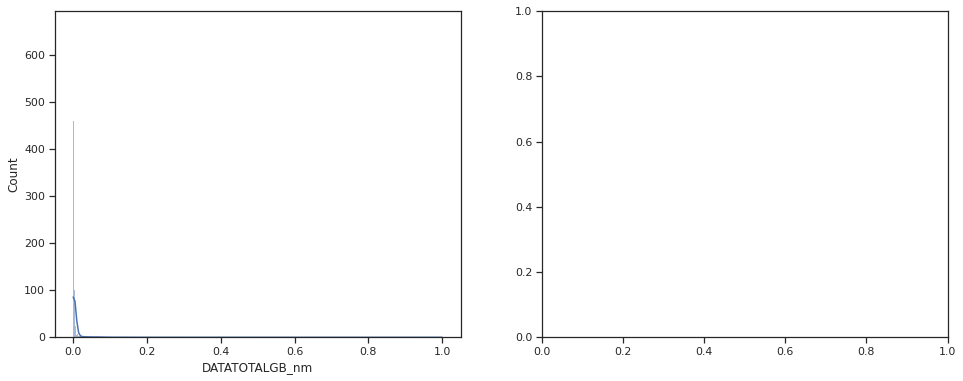

In [87]:
fig,axes =plt.subplots(ncols=2,figsize=(16,6))
sns.histplot(data=df,x=trans_col_name,ax=axes[0], kde=True)

### FASE FINAL

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [89]:
import itertools

from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.linear_model import LogisticRegression

from sklearn.dummy import DummyClassifier

from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report

##PREPROCESING

In [90]:
preds_st = ["DATADOWNGB",	"DATAUPGB", "TIEMPO_ACTIVACION", "VELOCIDAD", "PD_VC_FEE"	]
preds_nt = ["DATADOWNGB",	  "BS_UN_NM_HOME",	"BS_UN_NM_CORPORATE", "VELOCIDAD_RB",	"VELOCIDAD_BIN",		"GNDR_1",	"GNDR_2",	"DEPARTAMENTO_ORD",	"MUNICIPIO_ORD",	 	"NODO_ORD", 	"MUNICIPIO_FREQ"]
preds_nt2=["TIEMPO_ACTIVACION", "PD_VC_FEE", "BS_UN_NM_HOME", 	"BS_UN_NM_CORPORATE", 	"VELOCIDAD_RB", 	"VELOCIDAD_BIN", 	"GNDR_0", 	"GNDR_1", 	"GNDR_2", 	"DEPARTAMENTO_ORD", 	"ST_ACTIVO",	"ST_PREVIA SUSPENSION - MENSAJE FACT. VENC.", 	"ST_PROPUESTO A CORTE", 	"ST_PROSPECTO 1 DE BAJA POR SALDO", 	"MUNICIPIO_ORD", 	"NODO_ORD", 	"MUNICIPIO_FREQ"]

response_var = "ABUSADOR"

In [91]:
df

,CONTRATO,MSISDN_DD,AR_SSCRBR_DD,CSTMR_CD,DATADOWNGB,DATAUPGB,MES,BS_UN_NM,AR_ST_NM,TIEMPO_ACTIVACION,VELOCIDAD,PD_VC_FEE,PRSN_TP_CD,CSTMR_DOC,GNDR,RGU_F,NODO,DEPARTAMENTO,MUNICIPIO,LATITUD,LONGITUD,ABUSADOR,VELOCIDAD_MB,DATATOTALGB,exp_DATATOTALGB,DATATOTALGB_mm,BS_UN_NM_HOME,BS_UN_NM_CORPORATE,VELOCIDAD_RB,VELOCIDAD_BIN,GNDR_0,GNDR_1,GNDR_2,DEPARTAMENTO_ORD,ST_ACTIVO,ST_PREVIA SUSPENSION - MENSAJE FACT. VENC.,ST_PROPUESTO A CORTE,ST_PROSPECTO 1 DE BAJA POR SALDO,MUNICIPIO_ORD,NODO_ORD,MUNICIPIO_FREQ,DATATOTALGB_nm
0,966229,12224893,42771774,-646900,3638.40,214.33,11/2020,HOME,ACTIVO,1361,40,1250.00,P,60895,M,Y,MP6535B,Guatemala,Villa Nueva,14.5202,-90.6008,1,40 MB,3852.73,43.052988,0.021900,1,0,1.0,1,0,0,1,1,1,0,0,0,1,1,411,0.021900
1,3926793,12663376,72510954,-1235265,4374.58,308.29,11/2020,HOME,ACTIVO,167,100,2232.14,P,2240838991202,M,Y,SM9063A,San Marcos,San Marcos,14.9701,-91.8009,1,100 MB,4682.87,96.845336,0.028273,1,0,4.0,1,0,0,1,2,1,0,0,0,2,2,59,0.028273
2,3924742,12664506,72488898,-1234158,3170.28,214.94,11/2020,HOME,ACTIVO,172,30,406.25,P,2773150420920,M,Y,CQ4038A,Quetzaltenango,Coatepeque,14.7026,-91.8762,1,30 MB,3385.22,27.272501,0.018311,1,0,0.5,1,0,0,1,3,1,0,0,0,3,3,58,0.018311
3,3904070,12657723,72165521,-1222867,8896.64,576.19,11/2020,HOME,ACTIVO,187,70,1785.71,P,2224990950701,M,Y,QX6590A,Quetzaltenango,Quetzaltenango,14.8363,-91.5047,1,70 MB,9472.83,10413.002524,0.065044,1,0,2.5,1,0,0,1,3,1,0,0,0,4,4,210,0.065044
4,3875960,12651742,71681860,-1207068,5377.29,456.17,11/2020,HOME,ACTIVO,211,40,1250.00,P,3369741320920,M,Y,CQ4141A,Quetzaltenango,Coatepeque,14.7092,-91.8514,1,40 MB,5833.46,297.894168,0.037106,1,0,1.0,1,0,0,1,3,1,0,0,0,3,5,58,0.037106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4313,3928571,12662681,72558616,-1236180,1163.82,25.65,11/2020,HOME,ACTIVO,170,10,223.21,P,3067006030601,F,Y,SM8863A,San Marcos,San Marcos,14.9613,-91.7946,0,10 MB,1189.47,3.195015,0.001454,1,0,-0.5,1,0,1,1,2,1,0,0,0,2,28,59,0.001454
4314,3922369,12662287,72470314,-1232919,1246.23,60.64,11/2020,HOME,ACTIVO,171,100,2232.14,P,TBD,M,Y,TO5152B,Guatemala,Capital,14.5965,-90.4757,0,100 MB,1306.87,3.583143,0.002356,1,0,4.0,1,0,0,1,1,1,0,0,0,19,987,1330,0.002356
4315,3919195,12662134,72428579,-1231084,1211.77,116.45,11/2020,HOME,ACTIVO,177,10,223.21,P,2608958141301,F,Y,MP7042A,Guatemala,San Miguel Petapa,14.4954,-90.5529,0,10 MB,1328.22,3.658634,0.002520,1,0,-0.5,1,0,1,1,1,1,0,0,0,31,93,167,0.002520
4316,3917375,12662637,72410951,-1230056,1677.17,66.03,11/2020,HOME,ACTIVO,177,20,981.25,P,2307424400101,F,Y,RD4542A,Guatemala,Capital,14.6288,-90.5507,0,20 MB,1743.20,5.486792,0.005705,1,0,0.0,1,0,1,1,1,1,0,0,0,19,719,1330,0.005705


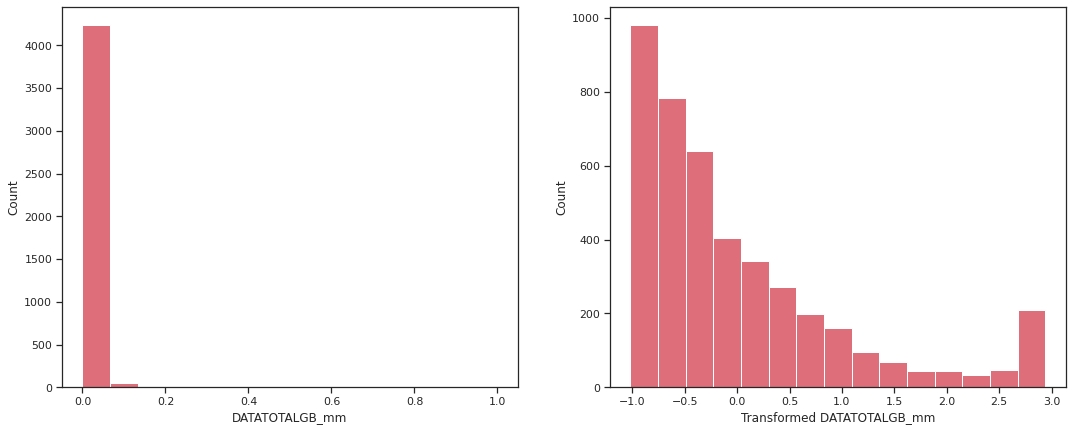

In [92]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
# Initial MaxLRNCArea distribution
sns.histplot(df["DATATOTALGB_mm"], ax=ax1, bins=15, color="#D53E4F")

ss = StandardScaler()
yj_std = PowerTransformer(method='yeo-johnson', standardize=True)

transformed_MaxLRNCArea = yj_std.fit_transform(df["DATATOTALGB_mm"].values.reshape((-1,1)))
ax2.set_xlabel("Transformed DATATOTALGB_mm")
sns.histplot(transformed_MaxLRNCArea.ravel(), ax=ax2, bins=15, color="#D53E4F");

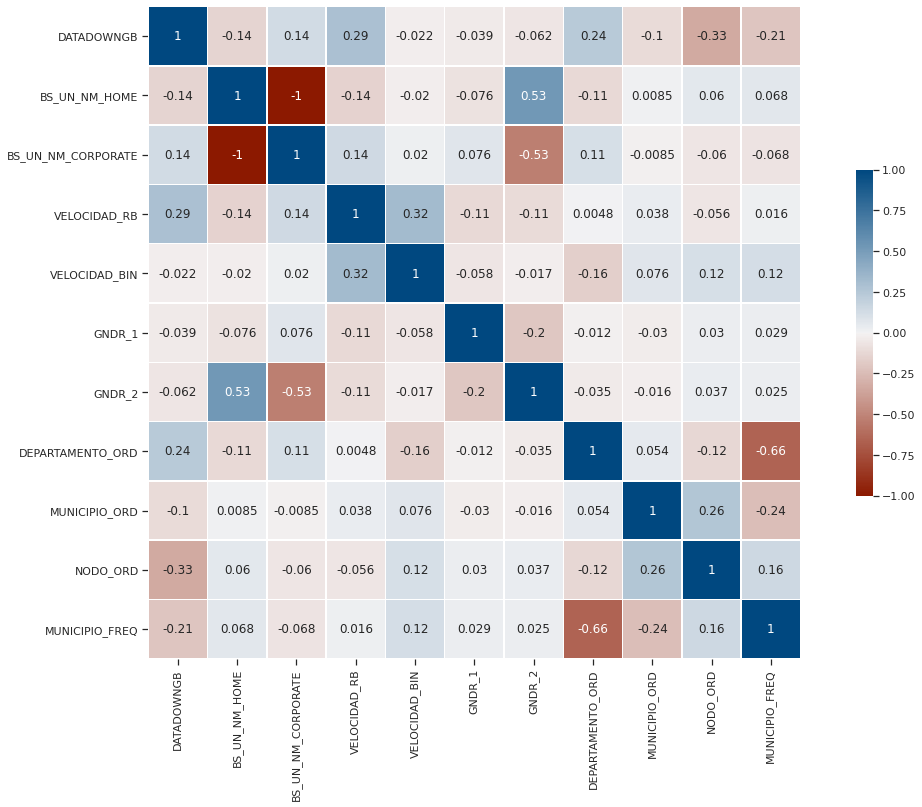

In [93]:
transformed_VC_preds = yj_std.fit_transform(df[preds_nt])
transformed_VC_preds_df = pd.DataFrame(transformed_VC_preds, columns=preds_nt)
corr = transformed_VC_preds_df.corr()
cmap = sns.diverging_palette(15, 250, s=100, l=30, as_cmap=True)
f, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(corr, cmap=cmap, center=0,
            square=True, linewidths=.5, vmin=-1, vmax=1, cbar_kws={"shrink": .5}, annot=True);



In [94]:
corr_matrix = corr.abs()
corr_threshold = 0.5 # <-- arbitrary
high_corr_var = np.where(corr_matrix > corr_threshold)

# Columns with high correlation
[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

[('BS_UN_NM_HOME', 'BS_UN_NM_CORPORATE'),
 ('BS_UN_NM_HOME', 'GNDR_2'),
 ('BS_UN_NM_CORPORATE', 'GNDR_2'),
 ('DEPARTAMENTO_ORD', 'MUNICIPIO_FREQ')]

In [95]:
location_preds=[  "DATAUPGB","DATADOWNGB", "VELOCIDAD_RB",		"DEPARTAMENTO_ORD",	"MUNICIPIO_ORD",			"NODO_ORD"]

In [96]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=25)
dc = DummyClassifier( strategy='stratified', random_state=0)
lr = LogisticRegression( max_iter=500, solver='newton-cg')
df.head()

,CONTRATO,MSISDN_DD,AR_SSCRBR_DD,CSTMR_CD,DATADOWNGB,DATAUPGB,MES,BS_UN_NM,AR_ST_NM,TIEMPO_ACTIVACION,VELOCIDAD,PD_VC_FEE,PRSN_TP_CD,CSTMR_DOC,GNDR,RGU_F,NODO,DEPARTAMENTO,MUNICIPIO,LATITUD,LONGITUD,ABUSADOR,VELOCIDAD_MB,DATATOTALGB,exp_DATATOTALGB,DATATOTALGB_mm,BS_UN_NM_HOME,BS_UN_NM_CORPORATE,VELOCIDAD_RB,VELOCIDAD_BIN,GNDR_0,GNDR_1,GNDR_2,DEPARTAMENTO_ORD,ST_ACTIVO,ST_PREVIA SUSPENSION - MENSAJE FACT. VENC.,ST_PROPUESTO A CORTE,ST_PROSPECTO 1 DE BAJA POR SALDO,MUNICIPIO_ORD,NODO_ORD,MUNICIPIO_FREQ,DATATOTALGB_nm
0,966229,12224893,42771774,-646900,3638.40,214.33,11/2020,HOME,ACTIVO,1361,40,1250.00,P,60895,M,Y,MP6535B,Guatemala,Villa Nueva,14.5202,-90.6008,1,40 MB,3852.73,43.052988,0.021900,1,0,1.0,1,0,0,1,1,1,0,0,0,1,1,411,0.021900
1,3926793,12663376,72510954,-1235265,4374.58,308.29,11/2020,HOME,ACTIVO,167,100,2232.14,P,2240838991202,M,Y,SM9063A,San Marcos,San Marcos,14.9701,-91.8009,1,100 MB,4682.87,96.845336,0.028273,1,0,4.0,1,0,0,1,2,1,0,0,0,2,2,59,0.028273
2,3924742,12664506,72488898,-1234158,3170.28,214.94,11/2020,HOME,ACTIVO,172,30,406.25,P,2773150420920,M,Y,CQ4038A,Quetzaltenango,Coatepeque,14.7026,-91.8762,1,30 MB,3385.22,27.272501,0.018311,1,0,0.5,1,0,0,1,3,1,0,0,0,3,3,58,0.018311
3,3904070,12657723,72165521,-1222867,8896.64,576.19,11/2020,HOME,ACTIVO,187,70,1785.71,P,2224990950701,M,Y,QX6590A,Quetzaltenango,Quetzaltenango,14.8363,-91.5047,1,70 MB,9472.83,10413.002524,0.065044,1,0,2.5,1,0,0,1,3,1,0,0,0,4,4,210,0.065044
4,3875960,12651742,71681860,-1207068,5377.29,456.17,11/2020,HOME,ACTIVO,211,40,1250.00,P,3369741320920,M,Y,CQ4141A,Quetzaltenango,Coatepeque,14.7092,-91.8514,1,40 MB,5833.46,297.894168,0.037106,1,0,1.0,1,0,0,1,3,1,0,0,0,3,5,58,0.037106


In [97]:
risk_scores = []
for pred in location_preds:
    dc_cv_scores = cross_val_score(dc, df[[pred]], df[response_var], scoring="roc_auc", cv=cv)
    lr_cv_scores = cross_val_score(lr, df[[pred]], df[response_var], scoring="roc_auc", cv=cv)

    t_stat, p_value = ttest_ind(lr_cv_scores, dc_cv_scores)
    diff = lr_cv_scores.mean() - dc_cv_scores.mean()
    one_sided_p = p_value/2 if diff > 0 else 1 - p_value/2
    
    risk_scores.append({
        "Predictor": pred,
        "Improvement": diff,
        "Pvalue": one_sided_p,
        "ROC": lr_cv_scores.mean()
    })

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: L

In [98]:
risk_scores_df = pd.DataFrame(risk_scores)
risk_scores_df.sort_values(by="Pvalue", ascending=True)

,Predictor,Improvement,Pvalue,ROC
0,DATAUPGB,0.457916,0.000000e+00,0.961043
1,DATADOWNGB,0.492947,0.000000e+00,0.996074
2,VELOCIDAD_RB,0.393673,0.000000e+00,0.896799
5,NODO_ORD,0.451693,0.000000e+00,0.954820
3,DEPARTAMENTO_ORD,0.237494,1.485890e-314,0.740621
4,MUNICIPIO_ORD,0.184536,3.625514e-217,0.687663


In [99]:
pipeline_log_reg = Pipeline(steps=[("box-cox", yj_std), ("logistic-regression", lr)])
vc_scores = []
for pred in preds_nt:
    dc_cv_scores = cross_val_score(dc, df[[pred]], df[response_var], scoring="roc_auc", cv=cv)
    lr_cv_scores = cross_val_score(pipeline_log_reg, df[[pred]], df[response_var], scoring="roc_auc", cv=cv)

    t_stat, p_value = ttest_ind(lr_cv_scores, dc_cv_scores)
    diff = lr_cv_scores.mean() - dc_cv_scores.mean()
    one_sided_p = p_value/2 if diff > 0 else 1 - p_value/2
    
    vc_scores.append({
        "Predictor": pred,
        "Pvalue": one_sided_p,
        "ROC": lr_cv_scores.mean()
    })
  #10 segs

In [100]:
vc_scores_df = pd.DataFrame(vc_scores).sort_values(by="Pvalue")
vc_scores_df

,Predictor,Pvalue,ROC
0,DATADOWNGB,0.000000e+00,0.996076
3,VELOCIDAD_RB,0.000000e+00,0.896814
9,NODO_ORD,0.000000e+00,0.954810
10,MUNICIPIO_FREQ,3.463822e-316,0.772012
7,DEPARTAMENTO_ORD,4.876267e-305,0.740650
8,MUNICIPIO_ORD,1.529888e-227,0.687792
1,BS_UN_NM_HOME,4.137136e-120,0.568659
2,BS_UN_NM_CORPORATE,3.935995e-119,0.568658
6,GNDR_2,6.528490e-50,0.530748
5,GNDR_1,5.503225e-38,0.540521


In [101]:
transformed_VC_preds_df

,DATADOWNGB,BS_UN_NM_HOME,BS_UN_NM_CORPORATE,VELOCIDAD_RB,VELOCIDAD_BIN,GNDR_1,GNDR_2,DEPARTAMENTO_ORD,MUNICIPIO_ORD,NODO_ORD,MUNICIPIO_FREQ
0,2.129778,0.165413,-0.165413,0.807696,0.121680,-0.680248,0.135633,-0.544739,-1.849641,-2.370132,0.034291
1,2.384081,0.165413,-0.165413,1.812280,0.121680,-0.680248,0.135633,1.199471,-1.661404,-2.334452,-1.134935
2,1.922897,0.165413,-0.165413,0.394937,0.121680,-0.680248,0.135633,1.644209,-1.500632,-2.303907,-1.142382
3,3.162145,0.165413,-0.165413,1.470386,0.121680,-0.680248,0.135633,1.644209,-1.357617,-2.276689,-0.452405
4,2.641037,0.165413,-0.165413,0.807696,0.121680,-0.680248,0.135633,1.644209,-1.500632,-2.251858,-1.142382
...,...,...,...,...,...,...,...,...,...,...,...
4313,-0.133252,0.165413,-0.165413,-1.569297,0.121680,1.470052,0.135633,1.199471,-1.661404,-1.894913,-1.134935
4314,0.044212,0.165413,-0.165413,1.812280,0.121680,-0.680248,0.135633,-0.544739,0.043343,1.720792,1.171583
4315,-0.027752,0.165413,-0.165413,-1.569297,0.121680,1.470052,0.135633,-0.544739,0.810105,-1.338713,-0.596512
4316,0.744569,0.165413,-0.165413,-0.287338,0.121680,1.470052,0.135633,-0.544739,0.043343,1.050159,1.171583


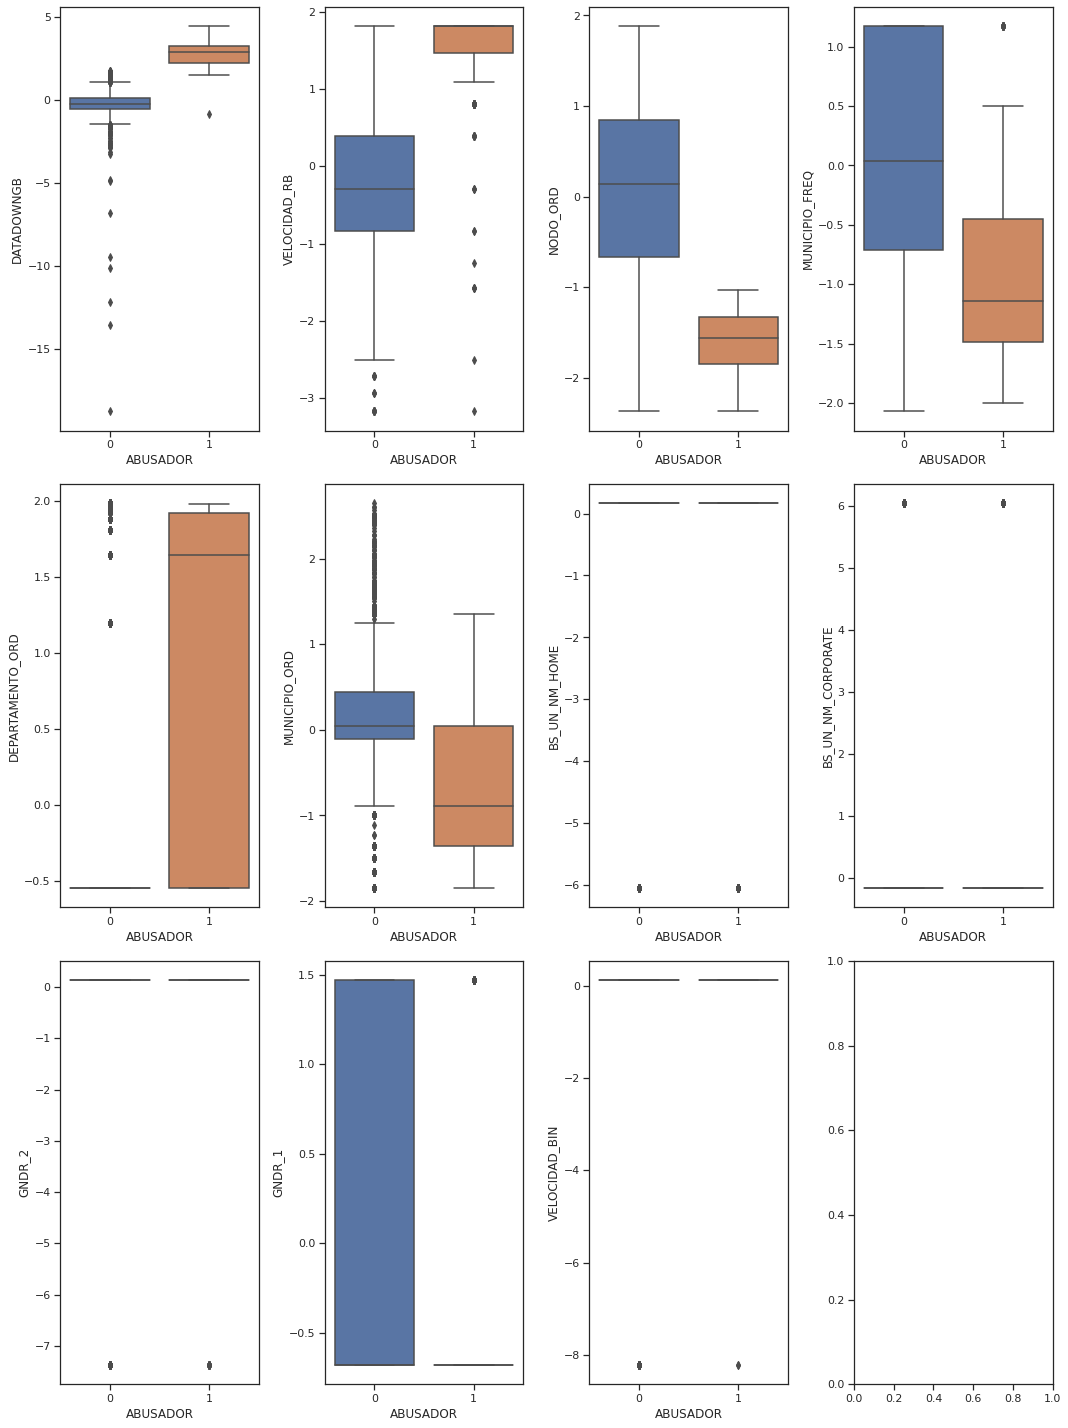

In [102]:
transformed_VC_preds_df = pd.DataFrame(yj_std.fit_transform(df[preds_nt]), columns=preds_nt)
transformed_VC_preds_df[response_var] = df[response_var]
fig, axes = plt.subplots(round(len(preds_nt)/4), 4, figsize=(15, 20))
for idx, pred in enumerate(vc_scores_df["Predictor"]):
    i, j = divmod(idx, 4)
    ax = axes[i, j]
    p_val = vc_scores_df[vc_scores_df["Predictor"] == pred]["Pvalue"]
    #ax.set_title(pred + ", P-value: %.5f" % p_val)
    ax.set_ylabel(" ")
    sns.boxplot(x=response_var, y=pred, data=transformed_VC_preds_df, ax=ax)
    
fig.tight_layout();

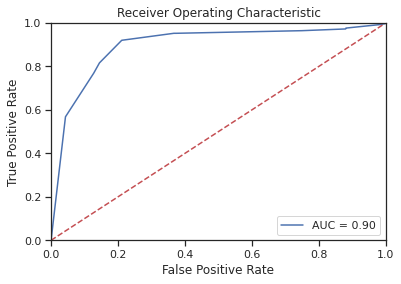

In [103]:
lr.fit(df[["VELOCIDAD_RB"]], df[response_var])
fpr, tpr, thresholds = roc_curve(df[response_var], lr.predict_proba(df[["VELOCIDAD_RB"]])[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [104]:
train_scaled = df.copy()
train_scaled[preds_nt] = yj_std.fit_transform(df[preds_nt])

VC_pairs = itertools.combinations(preds_nt, 2)
vc_int_scores = []
for pred1, pred2 in VC_pairs:
    # Model with just a pair of vascuCAP predictors
    lr_cv_scores = cross_val_score(lr, train_scaled[[pred1, pred2]], train_scaled[response_var], scoring="roc_auc", cv=cv)
    
    # Model with a pair of vascuCAP predictors + an interaction term
    train_scaled[pred1 + "_" + pred2] = train_scaled[pred1] * train_scaled[pred2]
    lr_int_cv_scores = cross_val_score(lr, train_scaled[[pred1, pred2, pred1 + "_" + pred2]], train_scaled[response_var], scoring="roc_auc", cv=cv)
    
    t_stat, p_value = ttest_ind(lr_int_cv_scores, lr_cv_scores)
    diff = lr_int_cv_scores.mean() - lr_cv_scores.mean()
    one_sided_p = p_value/2 if diff > 0 else 1 - p_value/2
    
    vc_int_scores.append({
        "Predictor1": pred1,
        "Predictor2": pred2,
        "Improvement": diff,
        "Pvalue": one_sided_p,
        "ROC_base": lr_cv_scores.mean(),
        "ROC_int": lr_int_cv_scores.mean()
    }) # 1:50 min

In [161]:
vc_int_scores

[{'Improvement': -1.5785817165214766e-05,
  'Predictor1': 'DATADOWNGB',
  'Predictor2': 'BS_UN_NM_HOME',
  'Pvalue': 0.5060630094380989,
  'ROC_base': 0.9960849875939533,
  'ROC_int': 0.996069201776788},
 {'Improvement': 3.920552886005346e-06,
  'Predictor1': 'DATADOWNGB',
  'Predictor2': 'BS_UN_NM_CORPORATE',
  'Pvalue': 0.49849136843408604,
  'ROC_base': 0.9960857631836944,
  'ROC_int': 0.9960896837365804},
 {'Improvement': -0.00012110238317131206,
  'Predictor1': 'DATADOWNGB',
  'Predictor2': 'VELOCIDAD_RB',
  'Pvalue': 0.5464506531414179,
  'ROC_base': 0.996131337069268,
  'ROC_int': 0.9960102346860967},
 {'Improvement': -9.83643383644095e-05,
  'Predictor1': 'DATADOWNGB',
  'Predictor2': 'VELOCIDAD_BIN',
  'Pvalue': 0.5375831668209253,
  'ROC_base': 0.9960668904999939,
  'ROC_int': 0.9959685261616295},
 {'Improvement': -3.5347913968530875e-05,
  'Predictor1': 'DATADOWNGB',
  'Predictor2': 'GNDR_1',
  'Pvalue': 0.5135400588550908,
  'ROC_base': 0.9960932111690732,
  'ROC_int': 0.99

In [ ]:
train_scaled = df.copy()
train_scaled[preds_nt] = yj_std.fit_transform(df[preds_nt])

VC_pairs = itertools.combinations(preds_nt, 2)
vc_int_scores = []
for pred1, pred2 in VC_pairs:
    # Model with just a pair of vascuCAP predictors
    lr_cv_scores = cross_val_score(lr, train_scaled[[pred1, pred2]], train_scaled[response_var], scoring="roc_auc", cv=cv)
    
    # Model with a pair of vascuCAP predictors + an interaction term
    train_scaled[pred1 + "_" + pred2] = train_scaled[pred1] * train_scaled[pred2]
    lr_int_cv_scores = cross_val_score(lr, train_scaled[[pred1, pred2, pred1 + "_" + pred2]], train_scaled[response_var], scoring="roc_auc", cv=cv)
    
    t_stat, p_value = ttest_ind(lr_int_cv_scores, lr_cv_scores)
    diff = lr_int_cv_scores.mean() - lr_cv_scores.mean()
    one_sided_p = p_value/2 if diff > 0 else 1 - p_value/2
    
    vc_int_scores.append({
        "Predictor1": pred1,
        "Predictor2": pred2,
        "Improvement": diff,
        "Pvalue": one_sided_p,
        "ROC_base": lr_cv_scores.mean(),
        "ROC_int": lr_int_cv_scores.mean()
    }) # 1:50 min

In [105]:
vc_int_scores_df = pd.DataFrame(vc_int_scores).sort_values(by="Pvalue")

In [106]:
# Filter by Pvalue <= 0.2
vc_int_scores_df[(vc_int_scores_df["Pvalue"] <= 0.3)]

,Predictor1,Predictor2,Improvement,Pvalue,ROC_base,ROC_int
14,BS_UN_NM_HOME,GNDR_2,0.015356,0.000007,0.563033,0.578389
22,BS_UN_NM_CORPORATE,GNDR_2,0.014712,0.000012,0.563692,0.578404
9,DATADOWNGB,MUNICIPIO_FREQ,0.000592,0.269744,0.996051,0.996642


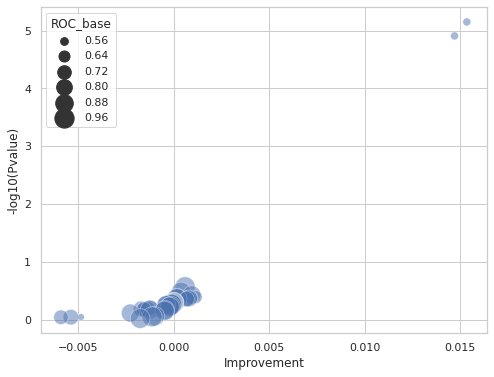

In [107]:
filtered_scores = vc_int_scores_df[vc_int_scores_df["ROC_base"] > 0.5]

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_ylabel("-log10(Pvalue)")
sns.scatterplot( x=filtered_scores["Improvement"], y=-np.log10(filtered_scores["Pvalue"]), size=filtered_scores["ROC_base"],sizes=(40, 400), alpha=.5);

In [108]:
vc_int_scores_df[(vc_int_scores_df["Pvalue"] <= 0.2)].shape

(2, 6)

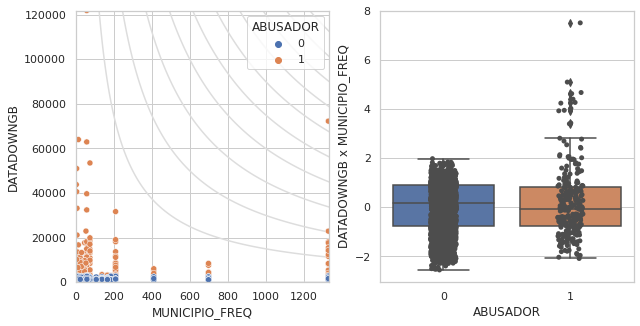

In [109]:
y = np.linspace(0, df["DATADOWNGB"].max()+5, 100)
x = np.linspace(0, df["MUNICIPIO_FREQ"].max()+5, 100)
X, Y = np.meshgrid(x, y)
Z = X * Y

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.contour(X, Y, Z, levels=15, colors='#ddd')
ax1.set_ylim([0, df["DATADOWNGB"].max()+5])
ax1.set_xlim([0, df["MUNICIPIO_FREQ"].max()+5])
sns.scatterplot(y="DATADOWNGB", x="MUNICIPIO_FREQ", hue=response_var, data=df, ax=ax1, zorder=2.5)

interaction_term = yj_std.fit_transform((df["DATADOWNGB"]*df["MUNICIPIO_FREQ"]).values.reshape((-1, 1))).reshape(-1,)
sns.boxplot(x=df[response_var], y=interaction_term, ax=ax2)
sns.stripplot(x=df[response_var], y=interaction_term, color=".3", ax=ax2)
ax2.set_ylabel("DATADOWNGB x MUNICIPIO_FREQ");

In [110]:
def add_get_interactions(df, preds_for_int, pairs = []):
    int_preds = []
    if len(pairs) == 0:
        pairs = list(itertools.combinations(preds_for_int, 2))
    for pred1, pred2 in pairs:
        new_int_pred = pred1 + "_" + pred2
        int_preds.append(new_int_pred)
        df[new_int_pred] = df[pred1] * df[pred2]
            
    return int_preds

In [111]:
def get_uncorrelated_columns(df, threshold = 0.75):
    df_corr = df.corr()
    columns = np.full((df_corr.shape[0],), True, dtype=bool)
    for i in range(df_corr.shape[0]):
        for j in range(i+1, df_corr.shape[0]):
            if df_corr.iloc[i,j] >= threshold:
                if columns[j]:
                    columns[j] = False
    uncorr_columns = df.columns[columns]
    return uncorr_columns

In [112]:
def rfe_eval(df, preds, response_var):            
    result = {
        "Features": [],
        "ROC": []
    }
    for i in range(1, len(preds)+1):
        rfe = RFE(estimator=lr, n_features_to_select=i)
        scores = cross_val_score(rfe, df[location_preds], df[response_var], scoring="roc_auc", cv=cv)
        result["Features"].append(i)
        result["ROC"].append(scores.mean())
        
    return pd.DataFrame(result)

In [113]:
%%time
# Risk preds, main effects, no corr filter
train_copy = df.copy()
train_copy[location_preds] = ss.fit_transform(train_copy[location_preds])
risk_main = rfe_eval(train_copy, location_preds, response_var)

CPU times: user 2min 52s, sys: 2min 9s, total: 5min 2s
Wall time: 2min 34s


In [114]:
%%time
# Risk preds, main effects + int, no corr filter
train_copy = df.copy()
int_preds = add_get_interactions(train_copy, location_preds)
train_copy[location_preds + int_preds] = ss.fit_transform(train_copy[location_preds + int_preds])
risk_int = rfe_eval(train_copy, location_preds + int_preds, response_var)

CPU times: user 5min 33s, sys: 4min 7s, total: 9min 40s
Wall time: 4min 56s


In [115]:
%%time
# Risk preds, main effects, w/ corr filter
train_copy = df.copy()
uncorr_preds = get_uncorrelated_columns(train_copy[location_preds])
train_copy[uncorr_preds] = ss.fit_transform(train_copy[uncorr_preds])
risk_main_filter = rfe_eval(train_copy, uncorr_preds, response_var)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: User

CPU times: user 17min 52s, sys: 13min 23s, total: 31min 15s
Wall time: 15min 58s


In [116]:
%%time
# Risk preds, main effects + int, w/ corr filter
train_copy = df.copy()
int_preds = add_get_interactions(train_copy, location_preds)
uncorr_preds = get_uncorrelated_columns(train_copy[location_preds + int_preds])
train_copy[uncorr_preds] = ss.fit_transform(train_copy[uncorr_preds])
risk_int_filter = rfe_eval(train_copy, uncorr_preds, response_var)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: User

CPU times: user 30min 26s, sys: 22min 43s, total: 53min 10s
Wall time: 27min 11s


In [117]:
%%time
# VC preds, main effects, no corr filter
train_copy = df.copy()
train_copy[preds_nt] = yj_std.fit_transform(train_copy[preds_nt])
vc_main = rfe_eval(train_copy, preds_nt, response_var)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

/usr/local/lib/python3.7/dist-packag

CPU times: user 10min 29s, sys: 7min 48s, total: 18min 18s
Wall time: 9min 21s


In [118]:
%%time
# VC preds, main effects + int, no corr filter
train_copy = df.copy()
filtered_vc_ints = vc_int_scores_df[(vc_int_scores_df["Pvalue"] <= 0.2)]
pairs = list(zip(filtered_vc_ints["Predictor1"], filtered_vc_ints["Predictor2"]))
int_preds = add_get_interactions(train_copy, [], pairs)
# train_copy[preds_nt + int_preds] = ss.fit_transform(train_copy[preds_nt + int_preds])
train_copy[preds_nt + int_preds] = yj_std.fit_transform(train_copy[preds_nt + int_preds])
vc_int = rfe_eval(train_copy, preds_nt + int_preds, response_var)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:426: LineSearchWarning:

Rounding errors prevent the line search from converging

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:426: LineSearchWarning:

Rounding errors prevent the line search from converging

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning

CPU times: user 11min 57s, sys: 8min 53s, total: 20min 50s
Wall time: 10min 39s


In [119]:
%%time
# VC preds, main effects, w/ corr filter
train_copy = df.copy()
uncorr_preds = get_uncorrelated_columns(train_copy[preds_nt])
train_copy[uncorr_preds] = yj_std.fit_transform(train_copy[uncorr_preds])
vc_main_filter = rfe_eval(train_copy, uncorr_preds, response_var)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:426: LineSearchWarning:

Rounding errors prevent the line search from converging

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed



CPU times: user 10min 18s, sys: 7min 41s, total: 17min 59s
Wall time: 9min 11s


In [120]:
%%time
# VC preds, main effects + int, w/ corr filter
train_copy = df.copy()
filtered_vc_ints = vc_int_scores_df[(vc_int_scores_df["Pvalue"] <= 0.2)]
pairs = list(zip(filtered_vc_ints["Predictor1"], filtered_vc_ints["Predictor2"]))
int_preds = add_get_interactions(train_copy, [], pairs)
uncorr_preds = get_uncorrelated_columns(train_copy[preds_nt + int_preds])
# train_copy[uncorr_preds] = ss.fit_transform(train_copy[uncorr_preds])
train_copy[uncorr_preds] = yj_std.fit_transform(train_copy[uncorr_preds])
vc_int_filter = rfe_eval(train_copy, uncorr_preds, response_var)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

/usr/local/lib/python3.7/dist-packag

CPU times: user 11min 10s, sys: 8min 19s, total: 19min 30s
Wall time: 9min 58s


In [121]:
%%time
# All preds, main effects, no corr filter
train_copy = df.copy()
# train_copy[location_preds] = ss.fit_transform(train_copy[location_preds])
train_copy[preds_nt] = yj_std.fit_transform(train_copy[preds_nt])
all_main = rfe_eval(train_copy, location_preds + preds_nt, response_var)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

/usr/local/lib/python3.7/dist-packag

CPU times: user 15min 19s, sys: 11min 27s, total: 26min 47s
Wall time: 13min 43s


In [122]:
%%time
# All preds, main effects + int, no corr filter
train_copy = df.copy()
filtered_vc_ints = vc_int_scores_df[(vc_int_scores_df["Pvalue"] <= 0.2)]
pairs = list(zip(filtered_vc_ints["Predictor1"], filtered_vc_ints["Predictor2"]))
int_preds = add_get_interactions(train_copy, [], pairs)
# train_copy[location_preds + preds_nt + int_preds] = ss.fit_transform(train_copy[location_preds + preds_nt + int_preds])
train_copy[location_preds] = ss.fit_transform(train_copy[location_preds])
train_copy[preds_nt + int_preds] = yj_std.fit_transform(train_copy[preds_nt + int_preds])
all_int = rfe_eval(train_copy, location_preds + preds_nt + int_preds, response_var)

CPU times: user 5min 40s, sys: 4min 12s, total: 9min 52s
Wall time: 5min 3s


In [123]:
%%time
# All preds, main effects, w/ corr filter
train_copy = df.copy()
uncorr_preds = get_uncorrelated_columns(train_copy[location_preds + preds_nt])
# train_copy[uncorr_preds] = ss.fit_transform(train_copy[uncorr_preds])
risk_uncorr_preds = [x for x in uncorr_preds if x in location_preds]
train_copy[risk_uncorr_preds] = ss.fit_transform(train_copy[risk_uncorr_preds])
VC_uncorr_preds = [x for x in uncorr_preds if x in preds_nt]
train_copy[VC_uncorr_preds] = yj_std.fit_transform(train_copy[VC_uncorr_preds])
all_main_filter = rfe_eval(train_copy, uncorr_preds, response_var)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sc

CPU times: user 36min 51s, sys: 27min 38s, total: 1h 4min 29s
Wall time: 33min 4s


In [124]:
%%time
# All preds, main effects + int, w/ corr filter
train_copy = df.copy()
filtered_vc_ints = vc_int_scores_df[(vc_int_scores_df["Pvalue"] <= 0.2)]
pairs = list(zip(filtered_vc_ints["Predictor1"], filtered_vc_ints["Predictor2"]))
int_preds = add_get_interactions(train_copy, [], pairs)
uncorr_preds = get_uncorrelated_columns(train_copy[location_preds + preds_nt + int_preds])
# train_copy[uncorr_preds] = ss.fit_transform(train_copy[uncorr_preds])
risk_uncorr_preds = [x for x in uncorr_preds if x in location_preds]
train_copy[risk_uncorr_preds] = ss.fit_transform(train_copy[risk_uncorr_preds])
VC_uncorr_preds = [x for x in uncorr_preds if (x in preds_nt) or (x in int_preds)]
train_copy[VC_uncorr_preds] = yj_std.fit_transform(train_copy[VC_uncorr_preds])
all_int_filter = rfe_eval(train_copy, uncorr_preds, response_var)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sc

CPU times: user 40min 24s, sys: 30min 26s, total: 1h 10min 50s
Wall time: 36min 19s


In [163]:
risk_main_filter

,Features,ROC
0,1,0.954757
1,2,0.992173
2,3,0.993446
3,4,0.993281
4,5,0.993713


Red: main effects
Blue: interaction effect


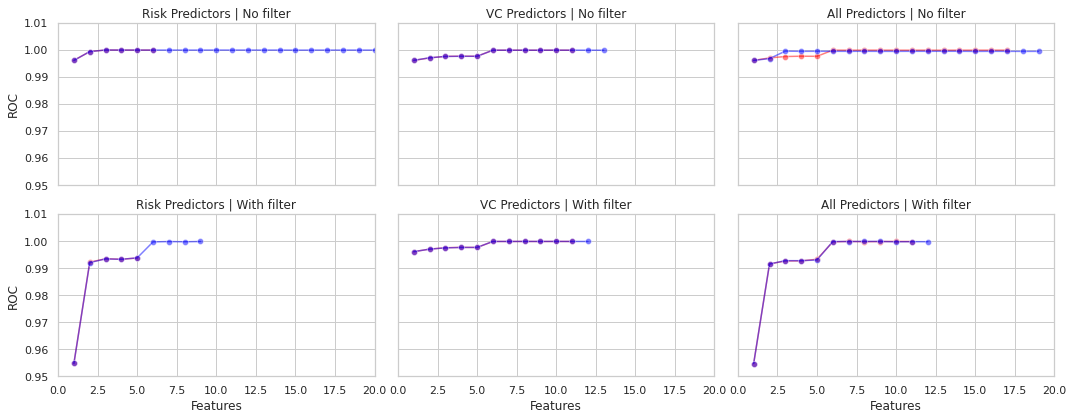

In [170]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(2, 3, figsize=(15,6), sharex=True, sharey=True)
# Risk preds
sns.lineplot(x="Features", y="ROC", data=risk_main, ax=axes[0,0], marker='o', color='red', alpha = 0.5)
sns.lineplot(x="Features", y="ROC", data=risk_int, ax=axes[0,0], marker='o', color='blue', alpha = 0.5)

sns.lineplot(x="Features", y="ROC", data=risk_main_filter,ax=axes[1,0], marker='o', color='red', alpha = 0.5)
sns.lineplot(x="Features", y="ROC", data=risk_int_filter, ax=axes[1,0], marker='o', color='blue', alpha = 0.5)

# VC preds
sns.lineplot(x="Features", y="ROC", data=vc_main, ax=axes[0,1], marker='o', color='red', alpha = 0.5)
sns.lineplot(x="Features", y="ROC", data=vc_int, ax=axes[0,1], marker='o', color='blue', alpha = 0.5)

sns.lineplot(x="Features", y="ROC", data=vc_main_filter, ax=axes[1,1], marker='o', color='red', alpha = 0.5)
sns.lineplot(x="Features", y="ROC", data=vc_int_filter, ax=axes[1,1], marker='o', color='blue', alpha = 0.5)

# All preds
sns.lineplot(x="Features", y="ROC", data=all_main, ax=axes[0,2], marker='o', color='red', alpha = 0.5)
sns.lineplot(x="Features", y="ROC", data=all_int, ax=axes[0,2], marker='o', color='blue', alpha = 0.5)

sns.lineplot(x="Features", y="ROC", data=all_main_filter, ax=axes[1,2], marker='o', color='red', alpha = 0.5 )
sns.lineplot(x="Features", y="ROC", data=all_int_filter, ax=axes[1,2], marker='o', color='blue', alpha = 0.5)


axes[0,0].set_ylim([0.95, 1.01])
axes[0,0].set_xlim([0, 20])

axes[0,0].set_title("Risk Predictors | No filter")
axes[1,0].set_title("Risk Predictors | With filter")
axes[0,1].set_title("VC Predictors | No filter")
axes[1,1].set_title("VC Predictors | With filter")
axes[0,2].set_title("All Predictors | No filter")
axes[1,2].set_title("All Predictors | With filter")

fig.tight_layout()
print('Red: main effects')
print('Blue: interaction effect')

In [160]:
print("Risk Predictors | No filter (main): \n",risk_main.max())
print("Risk Predictors | No filter (interactions): \n",risk_int.max())
print("Risk Predictors | With filte: (main):\n",risk_main_filter.max())
print("Risk Predictors | With filte: (interactions): \n",risk_int_filter.max())
print("VC Predictors | No filter: (main): \n",vc_main.max())
print("VC Predictors | No filter: (interactions):\n",vc_int.max())
print("VC Predictors | With filter: (main): \n",vc_main_filter.max())
print("VC Predictors | With filter: (interactions):\n ",vc_int_filter.max())
print("All Predictors | No filter: (main): \n",all_main.max())
print("All Predictors | No filter: (interactions): \n",all_int.max())
print("All Predictors | With filter: (main): \n",all_main_filter.max())
print("All Predictors | With filter: (interactions):\n ",all_int_filter.max())

Risk Predictors | No filter (main): 
 Features    6.000000
ROC         0.999917
dtype: float64
Risk Predictors | No filter (interactions): 
 Features    21.000000
ROC          0.999919
dtype: float64
Risk Predictors | With filte: (main):
 Features    5.000000
ROC         0.993713
dtype: float64
Risk Predictors | With filte: (interactions): 
 Features    9.000000
ROC         0.999831
dtype: float64
VC Predictors | No filter: (main): 
 Features    11.000000
ROC          0.999853
dtype: float64
VC Predictors | No filter: (interactions):
 Features    13.000000
ROC          0.999856
dtype: float64
VC Predictors | With filter: (main): 
 Features    11.000000
ROC          0.999852
dtype: float64
VC Predictors | With filter: (interactions):
  Features    12.000000
ROC          0.999858
dtype: float64
All Predictors | No filter: (main): 
 Features    17.000000
ROC          0.999856
dtype: float64
All Predictors | No filter: (interactions): 
 Features    19.000000
ROC          0.999497
dtype: fl

nuevas

CPU times: user 12.8 s, sys: 150 ms, total: 12.9 s
Wall time: 12.8 s


In [130]:
# VC preds, main effects, no corr filter
train_copy = df.copy()
train_copy[preds_nt] = yj_std.fit_transform(train_copy[preds_nt])

rfe = RFECV(estimator=lr, cv=cv)
rfe_transformed = rfe.fit_transform(train_copy[preds_nt], train_copy[response_var])

In [132]:
pd.DataFrame({
    "Predictor": preds_nt,
    "Selected": rfe.support_,
    "Rank": rfe.ranking_,
}).sort_values(by="Rank", ascending=True)

,Predictor,Selected,Rank
0,DATADOWNGB,True,1
3,VELOCIDAD_RB,True,1
6,GNDR_2,True,1
9,NODO_ORD,True,1
10,MUNICIPIO_FREQ,True,1
7,DEPARTAMENTO_ORD,False,2
8,MUNICIPIO_ORD,False,3
2,BS_UN_NM_CORPORATE,False,4
1,BS_UN_NM_HOME,False,5
4,VELOCIDAD_BIN,False,6


In [281]:
df_test

,CONTRATO,MSISDN_DD,AR_SSCRBR_DD,CSTMR_CD,DATADOWNGB,DATAUPGB,MES,BS_UN_NM,AR_ST_NM,TIEMPO_ACTIVACION,VELOCIDAD,PD_VC_FEE,PRSN_TP_CD,CSTMR_DOC,GNDR,RGU_F,NODO,DEPARTAMENTO,MUNICIPIO,LATITUD,LONGITUD,ABUSADOR,DATATOTALGB,exp_DATATOTALGB,VELOCIDAD_MB,DATATOTALGB_mm,BS_UN_NM_HOME,BS_UN_NM_CORPORATE,VELOCIDAD_RB,GNDR_0,GNDR_1,GNDR_2,DEPARTAMENTO_ORD,ST_ACTIVO,ST_PREVIA SUSPENSION - MENSAJE FACT. VENC.,ST_PROPUESTO A CORTE,ST_SUSPENDIDO POR SALDO ANTERIOR,MUNICIPIO_ORD,NODO_ORD,MUNICIPIO_FREQ,DATATOTALGB_nm
0,3634412,12470585,66232226,-1072472,12967.99,623.29,02/2021,HOME,ACTIVO,440,20,223.21,P,2485440981229,M,Y,SJ3137A,Guatemala,San Juan Sacatepequez (Ciudad Quetzal),14.7017,-90.5873,1,13591.28,581132.680203,20 MB,0.061379,1,0,0.0,0,0,1,1,1,0,0,0,30.0,89.0,229,0.061379
1,3906447,12699367,74344087,-1224226,3107.86,250.71,02/2021,HOME,ACTIVO,101,10,196.43,P,2377030410101,F,Y,SP3434A,Guatemala,San Pedro Sacatepequez,14.6849,-90.6073,1,3358.57,26.571880,10 MB,0.011495,1,0,-1.0,0,1,0,1,1,0,0,0,37.0,-1.0,106,0.011495
2,4059179,12705673,74505705,-1315259,2569.87,582.63,02/2021,HOME,ACTIVO,96,35,339.29,P,1627991790608,M,Y,CV6414A,Sacatepequez,Ciudad Vieja,14.5279,-90.7512,1,3152.50,21.728251,35 MB,0.010491,1,0,1.5,0,0,1,11,1,0,0,0,-1.0,-1.0,49,0.010491
3,4056952,12704991,74471357,-1314096,6913.31,613.61,02/2021,HOME,ACTIVO,95,25,303.57,P,1952375440110,F,Y,SJ2929A,Guatemala,San Juan Sacatepequez,14.7161,-90.6427,1,7526.92,1556.986985,25 MB,0.031816,1,0,0.5,0,1,0,1,1,0,0,0,7.0,25.0,88,0.031816
4,4052202,12703257,74385749,-1311281,4042.70,567.23,02/2021,HOME,ACTIVO,97,70,758.93,P,2732433141204,M,Y,SM8963A,San Marcos,San Marcos,14.9664,-91.7961,1,4609.93,90.186952,70 MB,0.017596,1,0,5.0,0,0,1,2,1,0,0,0,2.0,40.0,4,0.017596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3586631,12458739,65483206,-1050278,982.26,28.71,02/2021,HOME,ACTIVO,477,20,223.21,P,2220320301413,F,Y,TO5349A,Guatemala,Capital,14.5842,-90.4967,0,1010.97,2.683912,20 MB,0.000051,1,0,0.0,0,1,0,1,1,0,0,0,19.0,718.0,46,0.000051
996,3586709,12458675,65483925,-1050314,2209.16,187.87,02/2021,HOME,ACTIVO,478,15,178.57,P,2940550022207,M,Y,SJ3336A,Guatemala,San Juan Sacatepequez (Ciudad Quetzal),14.6922,-90.5910,0,2397.03,10.390060,15 MB,0.006808,1,0,-0.5,0,0,1,1,1,0,0,0,30.0,870.0,229,0.006808
997,3588250,12458934,65519879,-1050931,1076.67,36.77,02/2021,HOME,ACTIVO,465,20,223.21,P,1926818501008,F,Y,MP7344A,Guatemala,Villa Canales,14.4783,-90.5360,0,1113.44,2.966384,20 MB,0.000551,1,0,0.0,0,1,0,1,1,0,0,0,26.0,173.0,2,0.000551
998,3586794,12458747,65484845,-1050349,1414.65,48.53,02/2021,HOME,ACTIVO,477,15,178.57,P,3207726590501,M,Y,PP8854A,Escuintla,Escuintla,14.3009,-90.7589,0,1463.18,4.174050,15 MB,0.002256,1,0,-0.5,0,0,1,17,1,0,0,0,45.0,-1.0,3,0.002256


In [285]:
# Train
cols = df[preds_nt].columns[rfe.support_]
lr.fit(df[cols], df[response_var])
fpr, tpr, thresholds = roc_curve(df[response_var], lr.predict_proba(df[cols])[:, 1])
roc_auc = auc(fpr, tpr)
print("ROC train: ", round(roc_auc, 2))

# Test
fpr, tpr, thresholds = roc_curve(df_test[response_var], lr.predict_proba(df_test[cols])[:, 1])
roc_auc = auc(fpr, tpr)
print("ROC test: ", round(roc_auc, 2))

ROC train:  1.0
ROC test:  0.99


In [136]:
# All Predictors | With filter: (main)

train_copy = df.copy()
uncorr_preds = get_uncorrelated_columns(train_copy[location_preds + preds_nt])
# train_copy[uncorr_preds] = ss.fit_transform(train_copy[uncorr_preds])
risk_uncorr_preds = [x for x in uncorr_preds if x in location_preds]
train_copy[risk_uncorr_preds] = ss.fit_transform(train_copy[risk_uncorr_preds])
VC_uncorr_preds = [x for x in uncorr_preds if x in preds_nt]
train_copy[VC_uncorr_preds] = yj_std.fit_transform(train_copy[VC_uncorr_preds])

rfe = RFECV(estimator=lr, cv=cv)
rfe_transformed = rfe.fit_transform(train_copy[uncorr_preds], train_copy[response_var])

In [137]:
pd.DataFrame({
    "Predictor": uncorr_preds,
    "Selected": rfe.support_,
    "Rank": rfe.ranking_,
}).sort_values(by="Rank", ascending=True)

,Predictor,Selected,Rank
0,DATAUPGB,True,1
1,VELOCIDAD_RB,True,1
3,MUNICIPIO_ORD,True,1
4,NODO_ORD,True,1
7,VELOCIDAD_BIN,True,1
8,GNDR_1,True,1
9,GNDR_2,True,1
10,MUNICIPIO_FREQ,True,1
2,DEPARTAMENTO_ORD,False,2
5,BS_UN_NM_HOME,False,3


In [287]:
# Train
cols = df[uncorr_preds].columns[rfe.support_]
lr.fit(df[cols], train[response_var])
fpr, tpr, thresholds = roc_curve(train[response_var], lr.predict_proba(df[cols])[:, 1])
roc_auc = auc(fpr, tpr)
print("ROC train: ", round(roc_auc, 2))

# Test
fpr, tpr, thresholds = roc_curve(df_test[response_var], lr.predict_proba(df_test[cols])[:, 1])
roc_auc = auc(fpr, tpr)
print("ROC test: ", round(roc_auc, 2))

ROC train:  0.99
ROC test:  0.72


In [139]:
%%time
# VC preds, main effects, no corr filter
train_copy = df.copy()
train_copy[preds_nt] = yj_std.fit_transform(train_copy[preds_nt])
vc_main = rfe_eval(train_copy, preds_nt, response_var)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

/usr/local/lib/python3.7/dist-packag

CPU times: user 10min 32s, sys: 7min 56s, total: 18min 28s
Wall time: 9min 28s


In [141]:
%%time
# VC preds, main effects + int, no corr filter
train_copy = df.copy()
filtered_vc_ints = vc_int_scores_df[(vc_int_scores_df["Pvalue"] <= 0.2)]
pairs = list(zip(filtered_vc_ints["Predictor1"], filtered_vc_ints["Predictor2"]))
int_preds = add_get_interactions(train_copy, [], pairs)
# train_copy[VC_preds + int_preds] = ss.fit_transform(train_copy[VC_preds + int_preds])
train_copy[preds_nt + int_preds] = yj_std.fit_transform(train_copy[preds_nt + int_preds])
vc_int = rfe_eval(train_copy, preds_nt + int_preds, response_var)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:426: LineSearchWarning:

Rounding errors prevent the line search from converging

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not 

CPU times: user 11min 53s, sys: 8min 50s, total: 20min 44s
Wall time: 10min 35s


In [142]:
%%time
# VC preds, main effects, w/ corr filter
train_copy = df.copy()
uncorr_preds = get_uncorrelated_columns(train_copy[preds_nt])
train_copy[uncorr_preds] = yj_std.fit_transform(train_copy[uncorr_preds])
vc_main_filter = rfe_eval(train_copy, uncorr_preds, response_var)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:426: LineSearchWarning:

Rounding errors prevent the line search from converging

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not 

CPU times: user 10min 46s, sys: 8min 7s, total: 18min 54s
Wall time: 9min 42s


In [143]:
%%time
# VC preds, main effects + int, w/ corr filter
train_copy = df.copy()
filtered_vc_ints = vc_int_scores_df[(vc_int_scores_df["Pvalue"] <= 0.2)]
pairs = list(zip(filtered_vc_ints["Predictor1"], filtered_vc_ints["Predictor2"]))
int_preds = add_get_interactions(train_copy, [], pairs)
uncorr_preds = get_uncorrelated_columns(train_copy[preds_nt + int_preds])
# train_copy[uncorr_preds] = ss.fit_transform(train_copy[uncorr_preds])
train_copy[uncorr_preds] = yj_std.fit_transform(train_copy[uncorr_preds])
vc_int_filter = rfe_eval(train_copy, uncorr_preds, response_var)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

/usr/local/lib/python3.7/dist-packag

CPU times: user 11min 5s, sys: 8min 16s, total: 19min 21s
Wall time: 9min 53s


In [144]:
%%time
# All preds, main effects, no corr filter
train_copy = df.copy()
# train_copy[risk_preds] = ss.fit_transform(train_copy[risk_preds])
train_copy[preds_nt] = yj_std.fit_transform(train_copy[preds_nt])
all_main = rfe_eval(train_copy, location_preds + preds_nt, response_var)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

/usr/local/lib/python3.7/dist-packag

CPU times: user 15min, sys: 11min 11s, total: 26min 12s
Wall time: 13min 23s


In [146]:
%%time
# All preds, main effects + int, no corr filter
train_copy = df.copy()
filtered_vc_ints = vc_int_scores_df[(vc_int_scores_df["Pvalue"] <= 0.2)]
pairs = list(zip(filtered_vc_ints["Predictor1"], filtered_vc_ints["Predictor2"]))
int_preds = add_get_interactions(train_copy, [], pairs)
# train_copy[risk_preds + VC_preds + int_preds] = ss.fit_transform(train_copy[risk_preds + VC_preds + int_preds])
train_copy[location_preds] = ss.fit_transform(train_copy[location_preds])
train_copy[preds_nt + int_preds] = yj_std.fit_transform(train_copy[preds_nt + int_preds])
all_int = rfe_eval(train_copy, location_preds + preds_nt + int_preds, response_var)

CPU times: user 5min 54s, sys: 4min 26s, total: 10min 21s
Wall time: 5min 18s


In [147]:
%%time
# All preds, main effects, w/ corr filter
train_copy = df.copy()
uncorr_preds = get_uncorrelated_columns(train_copy[location_preds + preds_nt])
# train_copy[uncorr_preds] = ss.fit_transform(train_copy[uncorr_preds])
risk_uncorr_preds = [x for x in uncorr_preds if x in location_preds]
train_copy[risk_uncorr_preds] = ss.fit_transform(train_copy[risk_uncorr_preds])
VC_uncorr_preds = [x for x in uncorr_preds if x in preds_nt]
train_copy[VC_uncorr_preds] = yj_std.fit_transform(train_copy[VC_uncorr_preds])
all_main_filter = rfe_eval(train_copy, uncorr_preds, response_var)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sc

CPU times: user 37min 7s, sys: 27min 57s, total: 1h 5min 4s
Wall time: 33min 24s


In [149]:
%%time
# All preds, main effects + int, w/ corr filter
train_copy = df.copy()
filtered_vc_ints = vc_int_scores_df[(vc_int_scores_df["Pvalue"] <= 0.2)]
pairs = list(zip(filtered_vc_ints["Predictor1"], filtered_vc_ints["Predictor2"]))
int_preds = add_get_interactions(train_copy, [], pairs)
uncorr_preds = get_uncorrelated_columns(train_copy[location_preds + preds_nt + int_preds])
# train_copy[uncorr_preds] = ss.fit_transform(train_copy[uncorr_preds])
risk_uncorr_preds = [x for x in uncorr_preds if x in location_preds]
train_copy[risk_uncorr_preds] = ss.fit_transform(train_copy[risk_uncorr_preds])
VC_uncorr_preds = [x for x in uncorr_preds if (x in preds_nt) or (x in int_preds)]
train_copy[VC_uncorr_preds] = yj_std.fit_transform(train_copy[VC_uncorr_preds])
all_int_filter = rfe_eval(train_copy, uncorr_preds, response_var)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: L

CPU times: user 39min 52s, sys: 29min 55s, total: 1h 9min 47s
Wall time: 35min 46s


Red: main effects
Blue: interaction effect


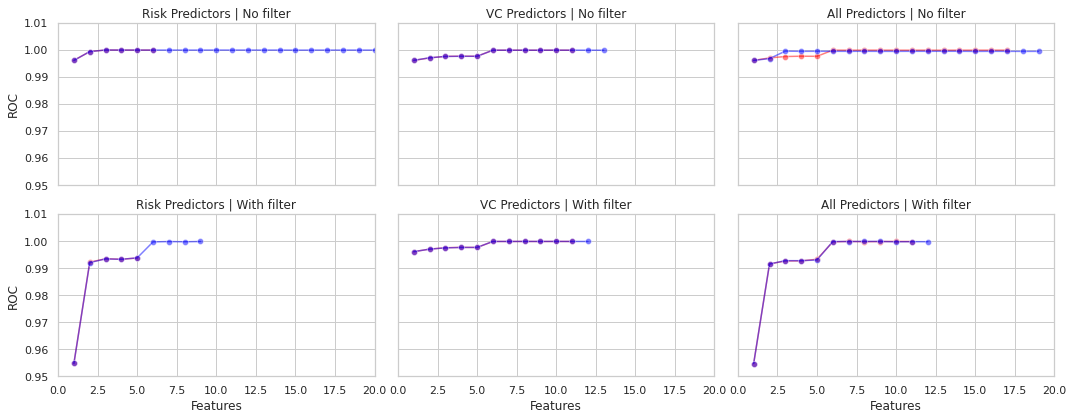

In [172]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(2, 3, figsize=(15,6), sharex=True, sharey=True)
# Risk preds
sns.lineplot(x="Features", y="ROC", data=risk_main, ax=axes[0,0], marker='o', color='red', alpha = 0.5)
sns.lineplot(x="Features", y="ROC", data=risk_int, ax=axes[0,0], marker='o', color='blue', alpha = 0.5)

sns.lineplot(x="Features", y="ROC", data=risk_main_filter,ax=axes[1,0], marker='o', color='red', alpha = 0.5)
sns.lineplot(x="Features", y="ROC", data=risk_int_filter, ax=axes[1,0], marker='o', color='blue', alpha = 0.5)

# VC preds
sns.lineplot(x="Features", y="ROC", data=vc_main, ax=axes[0,1], marker='o', color='red', alpha = 0.5)
sns.lineplot(x="Features", y="ROC", data=vc_int, ax=axes[0,1], marker='o', color='blue', alpha = 0.5)

sns.lineplot(x="Features", y="ROC", data=vc_main_filter, ax=axes[1,1], marker='o', color='red', alpha = 0.5)
sns.lineplot(x="Features", y="ROC", data=vc_int_filter, ax=axes[1,1], marker='o', color='blue', alpha = 0.5)

# All preds
sns.lineplot(x="Features", y="ROC", data=all_main, ax=axes[0,2], marker='o', color='red', alpha = 0.5)
sns.lineplot(x="Features", y="ROC", data=all_int, ax=axes[0,2], marker='o', color='blue', alpha = 0.5)

sns.lineplot(x="Features", y="ROC", data=all_main_filter, ax=axes[1,2], marker='o', color='red', alpha = 0.5 )
sns.lineplot(x="Features", y="ROC", data=all_int_filter, ax=axes[1,2], marker='o', color='blue', alpha = 0.5)


axes[0,0].set_ylim([0.95, 1.01])
axes[0,0].set_xlim([0, 20])

axes[0,0].set_title("Risk Predictors | No filter")
axes[1,0].set_title("Risk Predictors | With filter")
axes[0,1].set_title("VC Predictors | No filter")
axes[1,1].set_title("VC Predictors | With filter")
axes[0,2].set_title("All Predictors | No filter")
axes[1,2].set_title("All Predictors | With filter")

fig.tight_layout()
print('Red: main effects')
print('Blue: interaction effect')

In [151]:
print("Risk Predictors | No filter (main): \n",risk_main.max())
print("Risk Predictors | No filter (interactions): \n",risk_int.max())
print("Risk Predictors | With filte: (main):\n",risk_main_filter.max())
print("Risk Predictors | With filte: (interactions): \n",risk_int_filter.max())
print("VC Predictors | No filter: (main): \n",vc_main.max())
print("VC Predictors | No filter: (interactions):\n",vc_int.max())
print("VC Predictors | With filter: (main): \n",vc_main_filter.max())
print("VC Predictors | With filter: (interactions):\n ",vc_int_filter.max())
print("All Predictors | No filter: (main): \n",all_main.max())
print("All Predictors | No filter: (interactions): \n",all_int.max())
print("All Predictors | With filter: (main): \n",all_main_filter.max())
print("All Predictors | With filter: (interactions):\n ",all_int_filter.max())

Risk Predictors | No filter (main): 
 Features    6.000000
ROC         0.999917
dtype: float64
Risk Predictors | No filter (interactions): 
 Features    21.000000
ROC          0.999919
dtype: float64
Risk Predictors | With filte: (main):
 Features    5.000000
ROC         0.993713
dtype: float64
Risk Predictors | With filte: (interactions): 
 Features    9.000000
ROC         0.999831
dtype: float64
VC Predictors | No filter: (main): 
 Features    11.000000
ROC          0.999853
dtype: float64
VC Predictors | No filter: (interactions):
 Features    13.000000
ROC          0.999856
dtype: float64
VC Predictors | With filter: (main): 
 Features    11.000000
ROC          0.999852
dtype: float64
VC Predictors | With filter: (interactions):
  Features    12.000000
ROC          0.999858
dtype: float64
All Predictors | No filter: (main): 
 Features    17.000000
ROC          0.999856
dtype: float64
All Predictors | No filter: (interactions): 
 Features    19.000000
ROC          0.999497
dtype: fl

In [152]:
# VC preds, main effects, no corr filter
train_copy = df.copy()
train_copy[preds_nt] = yj_std.fit_transform(train_copy[preds_nt])

rfe = RFECV(estimator=lr, cv=cv)
rfe_transformed = rfe.fit_transform(train_copy[preds_nt], train_copy[response_var])

In [153]:
pd.DataFrame({
    "Predictor": preds_nt,
    "Selected": rfe.support_,
    "Rank": rfe.ranking_,
}).sort_values(by="Rank", ascending=True)

,Predictor,Selected,Rank
0,DATADOWNGB,True,1
3,VELOCIDAD_RB,True,1
6,GNDR_2,True,1
9,NODO_ORD,True,1
10,MUNICIPIO_FREQ,True,1
7,DEPARTAMENTO_ORD,False,2
8,MUNICIPIO_ORD,False,3
2,BS_UN_NM_CORPORATE,False,4
1,BS_UN_NM_HOME,False,5
4,VELOCIDAD_BIN,False,6


In [293]:
df[cols]

,DATADOWNGB,BS_UN_NM_HOME,VELOCIDAD_BIN,DEPARTAMENTO_ORD,MUNICIPIO_ORD,NODO_ORD,MUNICIPIO_FREQ
0,3638.40,1,1,1,1,1,411
1,4374.58,1,1,2,2,2,59
2,3170.28,1,1,3,3,3,58
3,8896.64,1,1,3,4,4,210
4,5377.29,1,1,3,3,5,58
...,...,...,...,...,...,...,...
4313,1163.82,1,1,2,2,28,59
4314,1246.23,1,1,1,19,987,1330
4315,1211.77,1,1,1,31,93,167
4316,1677.17,1,1,1,19,719,1330


In [294]:
# Train
cols = df[preds_nt].columns[rfe.support_]
lr.fit(df[preds_nt], df[response_var])
fpr, tpr, thresholds = roc_curve(df[response_var], lr.predict_proba(df[preds_nt])[:, 1])
roc_auc = auc(fpr, tpr)
print("ROC train: ", round(roc_auc, 2))

# Test
fpr, tpr, thresholds = roc_curve(df_test[response_var], lr.predict_proba(df_test[preds_nt])[:, 1])
roc_auc = auc(fpr, tpr)
print("ROC test: ", round(roc_auc, 2))

ROC train:  1.0
ROC test:  0.99


In [155]:
# All Predictors | With filter: (main)

train_copy = df.copy()
uncorr_preds = get_uncorrelated_columns(train_copy[location_preds + preds_nt])
# train_copy[uncorr_preds] = ss.fit_transform(train_copy[uncorr_preds])
risk_uncorr_preds = [x for x in uncorr_preds if x in location_preds]
train_copy[risk_uncorr_preds] = ss.fit_transform(train_copy[risk_uncorr_preds])
VC_uncorr_preds = [x for x in uncorr_preds if x in preds_nt]
train_copy[VC_uncorr_preds] = yj_std.fit_transform(train_copy[VC_uncorr_preds])

rfe = RFECV(estimator=lr, cv=cv)
rfe_transformed = rfe.fit_transform(train_copy[uncorr_preds], train_copy[response_var])

In [156]:
pd.DataFrame({
    "Predictor": uncorr_preds,
    "Selected": rfe.support_,
    "Rank": rfe.ranking_,
}).sort_values(by="Rank", ascending=True)

,Predictor,Selected,Rank
0,DATAUPGB,True,1
1,VELOCIDAD_RB,True,1
4,NODO_ORD,True,1
7,VELOCIDAD_BIN,True,1
8,GNDR_1,True,1
9,GNDR_2,True,1
10,MUNICIPIO_FREQ,True,1
3,MUNICIPIO_ORD,False,2
2,DEPARTAMENTO_ORD,False,3
5,BS_UN_NM_HOME,False,4


In [295]:
# Train
cols = df[uncorr_preds].columns[rfe.support_]
lr.fit(df[cols], df[response_var])
fpr, tpr, thresholds = roc_curve(df[response_var], lr.predict_proba(df[cols])[:, 1])
roc_auc = auc(fpr, tpr)
print("ROC train: ", round(roc_auc, 2))

# Test
fpr, tpr, thresholds = roc_curve(df_test[response_var], lr.predict_proba(df_test[cols])[:, 1])
roc_auc = auc(fpr, tpr)
print("ROC test: ", round(roc_auc, 2))

ROC train:  0.99
ROC test:  0.72


In [296]:

rf = RandomForestClassifier()

In [297]:
rf.fit(df[preds_st], df[response_var])


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [298]:
rf.feature_importances_


array([0.63416477, 0.2346901 , 0.02139262, 0.06347721, 0.0462753 ])

In [299]:
print('================ Resultados Random Forest =================\n')
print(classification_report(test[response_var], rf.predict(test[preds_st])))

================ Resultados Random Forest =================

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       971
           1       1.00      1.00      1.00        29

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [301]:
rf.fit(df[preds_nt], df[response_var])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [302]:
rf.feature_importances_

array([0.68270225, 0.00247511, 0.00412222, 0.10819995, 0.00148192,
       0.00256796, 0.00147418, 0.01826877, 0.0200379 , 0.13542959,
       0.02324015])

In [304]:
print('================ Resultados Random Forest =================\n')
print(classification_report(test[response_var], rf.predict(df_test[preds_nt])))

================ Resultados Random Forest =================

              precision    recall  f1-score   support

           0       0.99      0.15      0.26       971
           1       0.03      0.97      0.06        29

    accuracy                           0.17      1000
   macro avg       0.51      0.56      0.16      1000
weighted avg       0.97      0.17      0.25      1000



In [312]:
rf.fit(df[preds_nt], df[response_var])
rf.feature_importances_


array([0.66931278, 0.0055718 , 0.00422427, 0.11512065, 0.00119218,
       0.0022896 , 0.00093291, 0.01703319, 0.02723755, 0.13874568,
       0.01833938])

In [313]:
print('================ Resultados Random Forest =================\n')
print(classification_report(df_test[response_var], rf.predict(df_test[preds_nt])))

================ Resultados Random Forest =================

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       120
           1       1.00      0.97      0.99       880

    accuracy                           0.97      1000
   macro avg       0.91      0.99      0.94      1000
weighted avg       0.98      0.97      0.98      1000

